<a href="https://colab.research.google.com/github/oukhouya62/A-Hidden-Markov-Model-HMM-for-predicting-Bitcoin-prices-using-Python/blob/main/Project_of_Portfolio_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

<font size= "5"> **Portfolio Management** </font>

<center>


**About me**

- ***Directed by: Hassan OUKHOUYA***
- ***E-mail***: hassan.oukhouya@um5r.ac.ma
- ***LinkedIn***: https://www.linkedin.com/in/hassan-oukhouya-3901b816b/
- ***ORCID iD***:  https://orcid.org/0000-0002-5058-2008
- ***Upwork***: https://www.upwork.com/services/product/time-series-analysis-with-python-or-r-studio-1449669530698514432?ref=project_share
- **Fiverr**: https://www.fiverr.com/share/5Dzz6z 
    

# Introduction

This project aims to study the construction of a portfolio composed of four stocks (Google, Apple, Facebook, Amazon) and the S\&P500 stock index, all listed on the New York Stock Exchange. This study aims to minimize the risk associated with this portfolio by using portfolio management techniques.

The importance of portfolio management lies in finding a balance between expected return and risk. Volatility, which measures the dispersion of an asset's returns, is often used to measure risk. On the other hand, expected return represents the average expected return on an asset. Analyzing the relationship between volatility and expected return will improve our Performance.

In this context, we will examine different portfolio compositions, adjusting the investment proportions in each asset. The objective is to find the optimal combination that minimises the portfolio's overall risk while maximising the expected return. We will use concepts such as covariance and the correlation coefficient between asset returns to do this. Particular attention will be paid to the effect of correlations between asset returns on the portfolio's risk level. The correlation coefficient reflects the extent to which asset returns move together. We will study how the correlation between the selected stocks Een the S\&P500 index can influence the portfolio's overall risk.

To conduct this study, we will use the Python programming language and Jupyter Notebook in particular, which offers a range of tools and libraries for financial analysis and portfolio management. Using Python, we can perform volatility, covariance, and portfolio optimisation calculations to find the optimal composition that minimises risk.

In conclusion, this project will allow us to explore the fundamental concepts of portfolio management by studying the construction of a portfolio composed of Four stocks and a stock index. We will minimise risk using quantitative analysis and optimisation techniques while maximising expected return. Analysing the effect of correlations between asset returns will allow us to understand better the impact of diversification on the portfolio's risk level.

### Import libraries and data

In this notebook we will work on a new package [yfinance 0.2.3](https://pypi.org/project/yfinance/), which contains the major stock markets data from [Yahoo! Finance](https://finance.yahoo.com).

We need to import of the basic library to be able to analyze the data:

In [1]:
#Imports
import os
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
from pandas.util.testing import assert_frame_equal


import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from pylab import rcParams
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)


<ipython-input-1-b4e1c53cc508>:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


First of all if you don't have the yahoofinance libraries, you can install them via pip.

In [ ]:
#!pip install yfinance
#!pip install yahoofinancials

> In this project, we have chosen four stocks (Google, Apple, Facebook, Amazone, Microsoft) listed on the New York Stock Exchange and one market index (S\&P500).  

You can import any stock from the ``yfinance`` library and choose the period and name as a ticker.

In [3]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf
GOOG = yf.download("GOOG", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Google
AAPL = yf.download("AAPL", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Apple 
META = yf.download("META", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Facebook
AMZN = yf.download("AMZN", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Amazon 
MSFT = yf.download("MSFT", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Microsoft 
GSPC = yf.download("^GSPC", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of S&P 500
print(GOOG.shape, AAPL.shape, META.shape, AMZN.shape,MSFT.shape,GSPC.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(2673, 6) (2673, 6) (2673, 6) (2673, 6) (2673, 6) (2673, 6)


The stock size is 2673 observations and 6 variables. Visualize the head and tail for each stock:

In [4]:
GOOG

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  15.569143  15.751460  14.861794  14.953949  14.953949  239835606
2012-05-21  14.956689  15.334772  14.943986  15.295419  15.295419  123477094
2012-05-22  15.278732  15.287947  14.844360  14.963912  14.963912  122533571
2012-05-23  14.985082  15.183090  14.872255  15.179603  15.179603  127600492
2012-05-24  15.172131  15.240873  14.915842  15.035145  15.035145   75935562
...               ...        ...        ...        ...        ...        ...
2022-12-23  87.620003  90.099998  87.620003  89.809998  89.809998   17815000
2022-12-27  89.309998  89.500000  87.535004  87.930000  87.930000   15470900
2022-12-28  87.500000  88.519997  86.370003  86.459999  86.459999   17879600
2022-12-29  87.029999  89.364998  86.989998  88.949997  88.949997   18280700
2022-12-30  87.364998  88.830002  87.029999  88.730003  88.730003   19190300

[2673 rows x 6 columns]

In [5]:
AAPL

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   19.070000   19.407499   18.649286   18.942142   16.099731   
2012-05-21   19.089287   20.055000   19.073214   20.045713   17.037710   
2012-05-22   20.341070   20.495714   19.735001   19.891787   16.906883   
2012-05-23   19.910713   20.457144   19.758215   20.377144   17.319405   
2012-05-24   20.566786   20.589287   20.043928   20.190001   17.160343   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.477127   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.652435   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.674019   
2022-12-29  127.989998  130.479996  127.730003  129.610001  129.233658   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.552719   

               Volume  
Date                   
2012-05-18  732292400  
2012-05-21  631106000  
2012-05-22  694870400  
2012-05-23  584897600  
2012-05-24  496230000  
...               ...  
2022-12-23   63814900  
2022-12-27   69007800  
2022-12-28   85438400  
2022-12-29   75703700  
2022-12-30   77034200  

[2673 rows x 6 columns]

In [6]:
META

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   42.049999   45.000000   38.000000   38.230000   38.230000   
2012-05-21   36.529999   36.660000   33.000000   34.029999   34.029999   
2012-05-22   32.610001   33.590000   30.940001   31.000000   31.000000   
2012-05-23   31.370001   32.500000   31.360001   32.000000   32.000000   
2012-05-24   32.950001   33.209999   31.770000   33.029999   33.029999   
...                ...         ...         ...         ...         ...   
2022-12-23  116.029999  118.180000  115.540001  118.040001  118.040001   
2022-12-27  117.930000  118.599998  116.050003  116.879997  116.879997   
2022-12-28  116.250000  118.150002  115.510002  115.620003  115.620003   
2022-12-29  116.400002  121.029999  115.769997  120.260002  120.260002   
2022-12-30  118.160004  120.419998  117.739998  120.339996  120.339996   

               Volume  
Date                   
2012-05-18  573576400  
2012-05-21  168192700  
2012-05-22  101786600  
2012-05-23   73600000  
2012-05-24   50237200  
...               ...  
2022-12-23   17796600  
2022-12-27   21392300  
2022-12-28   19612500  
2022-12-29   22366200  
2022-12-30   19583800  

[2673 rows x 6 columns]

In [7]:
AMZN

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  10.970500  10.981500  10.640500  10.692500  10.692500  104634000
2012-05-21  10.701500  10.999000  10.641000  10.905500  10.905500   71596000
2012-05-22  10.915500  10.943500  10.698000  10.766500  10.766500   74662000
2012-05-23  10.735500  10.877500  10.559000  10.864000  10.864000   84876000
2012-05-24  10.849000  10.883000  10.635000  10.762000  10.762000   62822000
...               ...        ...        ...        ...        ...        ...
2022-12-23  83.250000  85.779999  82.930000  85.250000  85.250000   57433700
2022-12-27  84.970001  85.349998  83.000000  83.040001  83.040001   57284000
2022-12-28  82.800003  83.480003  81.690002  81.820000  81.820000   58228600
2022-12-29  82.870003  84.550003  82.550003  84.180000  84.180000   54995900
2022-12-30  83.120003  84.050003  82.470001  84.000000  84.000000   62401200

[2673 rows x 6 columns]

In [8]:
MSFT

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   29.790001   29.809999   29.170000   29.270000   23.669817   
2012-05-21   29.100000   29.790001   29.059999   29.750000   24.057983   
2012-05-22   29.690001   29.879999   29.500000   29.760000   24.066076   
2012-05-23   29.350000   29.400000   28.639999   29.110001   23.540434   
2012-05-24   29.160000   29.299999   28.760000   29.070000   23.508087   
...                ...         ...         ...         ...         ...   
2022-12-23  236.110001  238.869995  233.940002  238.729996  237.614105   
2022-12-27  238.699997  238.929993  235.830002  236.960007  235.852386   
2022-12-28  236.889999  239.720001  234.169998  234.529999  233.433731   
2022-12-29  235.649994  241.919998  235.649994  241.009995  239.883453   
2022-12-30  238.210007  239.960007  236.660004  239.820007  238.699020   

              Volume  
Date                  
2012-05-18  56205300  
2012-05-21  38787900  
2012-05-22  39504900  
2012-05-23  65171000  
2012-05-24  52575000  
...              ...  
2022-12-23  21207000  
2022-12-27  16688600  
2022-12-28  17457100  
2022-12-29  19770700  
2022-12-30  21938500  

[2673 rows x 6 columns]

In [9]:
GSPC

Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-05-18  1305.050049  1312.239990  1291.979980  1295.219971  1295.219971   
2012-05-21  1295.729980  1316.390015  1295.729980  1315.989990  1315.989990   
2012-05-22  1316.089966  1328.489990  1310.040039  1316.630005  1316.630005   
2012-05-23  1316.020020  1320.709961  1296.530029  1318.859985  1318.859985   
2012-05-24  1318.719971  1324.140015  1310.500000  1320.680054  1320.680054   
...                 ...          ...          ...          ...          ...   
2022-12-23  3815.110107  3845.800049  3797.010010  3844.820068  3844.820068   
2022-12-27  3843.340088  3846.649902  3813.219971  3829.250000  3829.250000   
2022-12-28  3829.560059  3848.320068  3780.780029  3783.219971  3783.219971   
2022-12-29  3805.449951  3858.189941  3805.449951  3849.280029  3849.280029   
2022-12-30  3829.060059  3839.850098  3800.340088  3839.500000  3839.500000   

                Volume  
Date                    
2012-05-18  4512470000  
2012-05-21  3786750000  
2012-05-22  4123680000  
2012-05-23  4108330000  
2012-05-24  3937670000  
...                ...  
2022-12-23  2819280000  
2022-12-27  3030300000  
2022-12-28  3083520000  
2022-12-29  3003680000  
2022-12-30  2979870000  

[2673 rows x 6 columns]

# Exploratory Data Analysis (EDA) 


Exploratory Data Analysis (EDA) for stocks like Google, Apple, Facebook, Amazon, and the S&P500 involves examining their historical price and volume data. Through visualizations, statistical measures, and studying relationships, EDA helps identify trends, patterns, and interdependencies among these stocks. It provides insights into their behaviour, distribution of returns, and market dependencies, assisting in decision-making and further analysis.

## Data Analysis

We start with the descriptive statistics of the variables; Open, High, Low, Close, Adj Close, and Volume for each company of GAFAM:

In [12]:
GOOG.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
AAPL.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
META.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
AMZN.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
MSFT.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
GSPC.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

> The presence of no missing values in each stock dataset is a positive finding, indicating that we have complete and reliable data for analysis. This allows for accurate assessments of various aspects of the stocks, simplifies data preparation, and ensures more robust and trustworthy studies.

In [13]:
#Combining dataframes
dataset = pd.concat([GOOG.Close, AAPL.Close,META.Close,AMZN.Close, MSFT.Close,GSPC.Close],axis=1) 
# Change the column names
dataset.columns =['GOOG', 'AAPL', 'META','AMZN','MSFT','GSPC']
dataset.head()

GOOG       AAPL       META     AMZN       MSFT         GSPC
Date                                                                        
2012-05-18  14.953949  18.942142  38.230000  10.6925  29.270000  1295.219971
2012-05-21  15.295419  20.045713  34.029999  10.9055  29.750000  1315.989990
2012-05-22  14.963912  19.891787  31.000000  10.7665  29.760000  1316.630005
2012-05-23  15.179603  20.377144  32.000000  10.8640  29.110001  1318.859985
2012-05-24  15.035145  20.190001  33.029999  10.7620  29.070000  1320.680054

In [14]:
print('Shape of data',dataset.shape)

Shape of data (2673, 6)


We have 2673 observations (day) and 6 variables. 

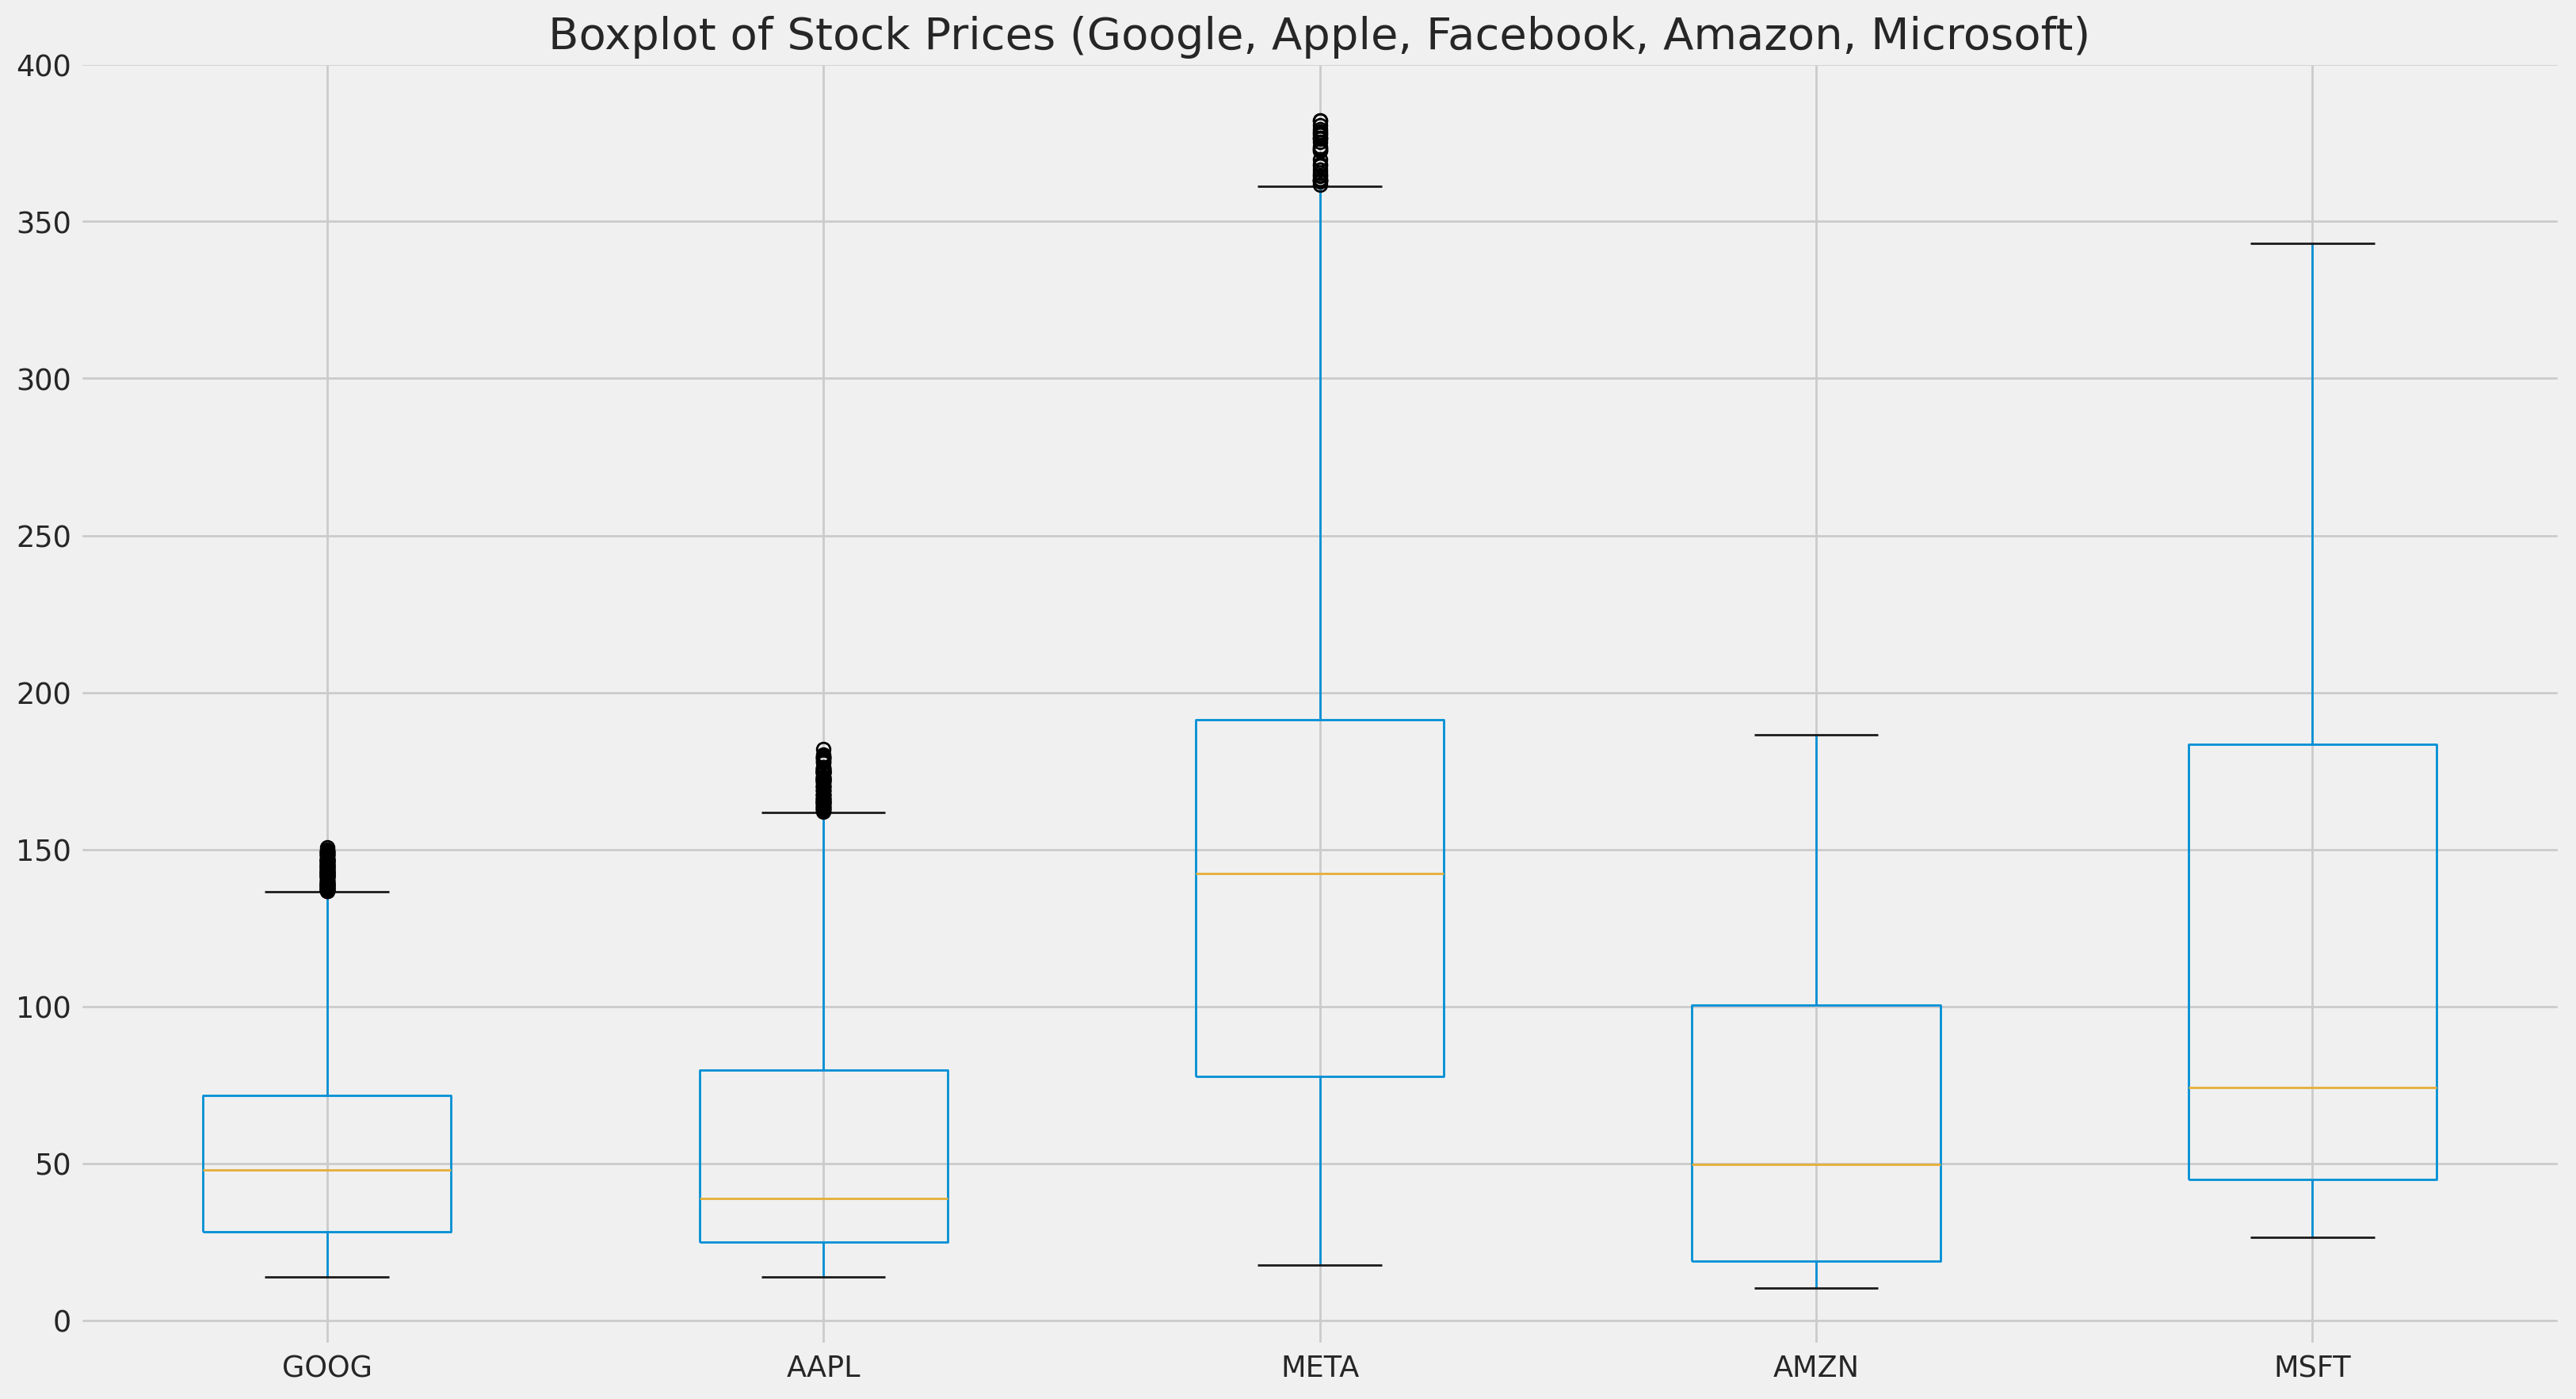

In [16]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','AAPL','META','AMZN','MSFT']].boxplot()
plt.title("Boxplot of Stock Prices (Google, Apple, Facebook, Amazon, Microsoft)")
plt.show()

> The boxplot reveals the presence of outliers in Facebook, Apple, and Google stock prices, indicating significant deviations from the overall pattern. These outliers suggest the occurrence of notable events or market conditions that impacted the stock prices of these companies. Further analysis is required to understand the factors influencing these outliers and their implications for investment decisions.

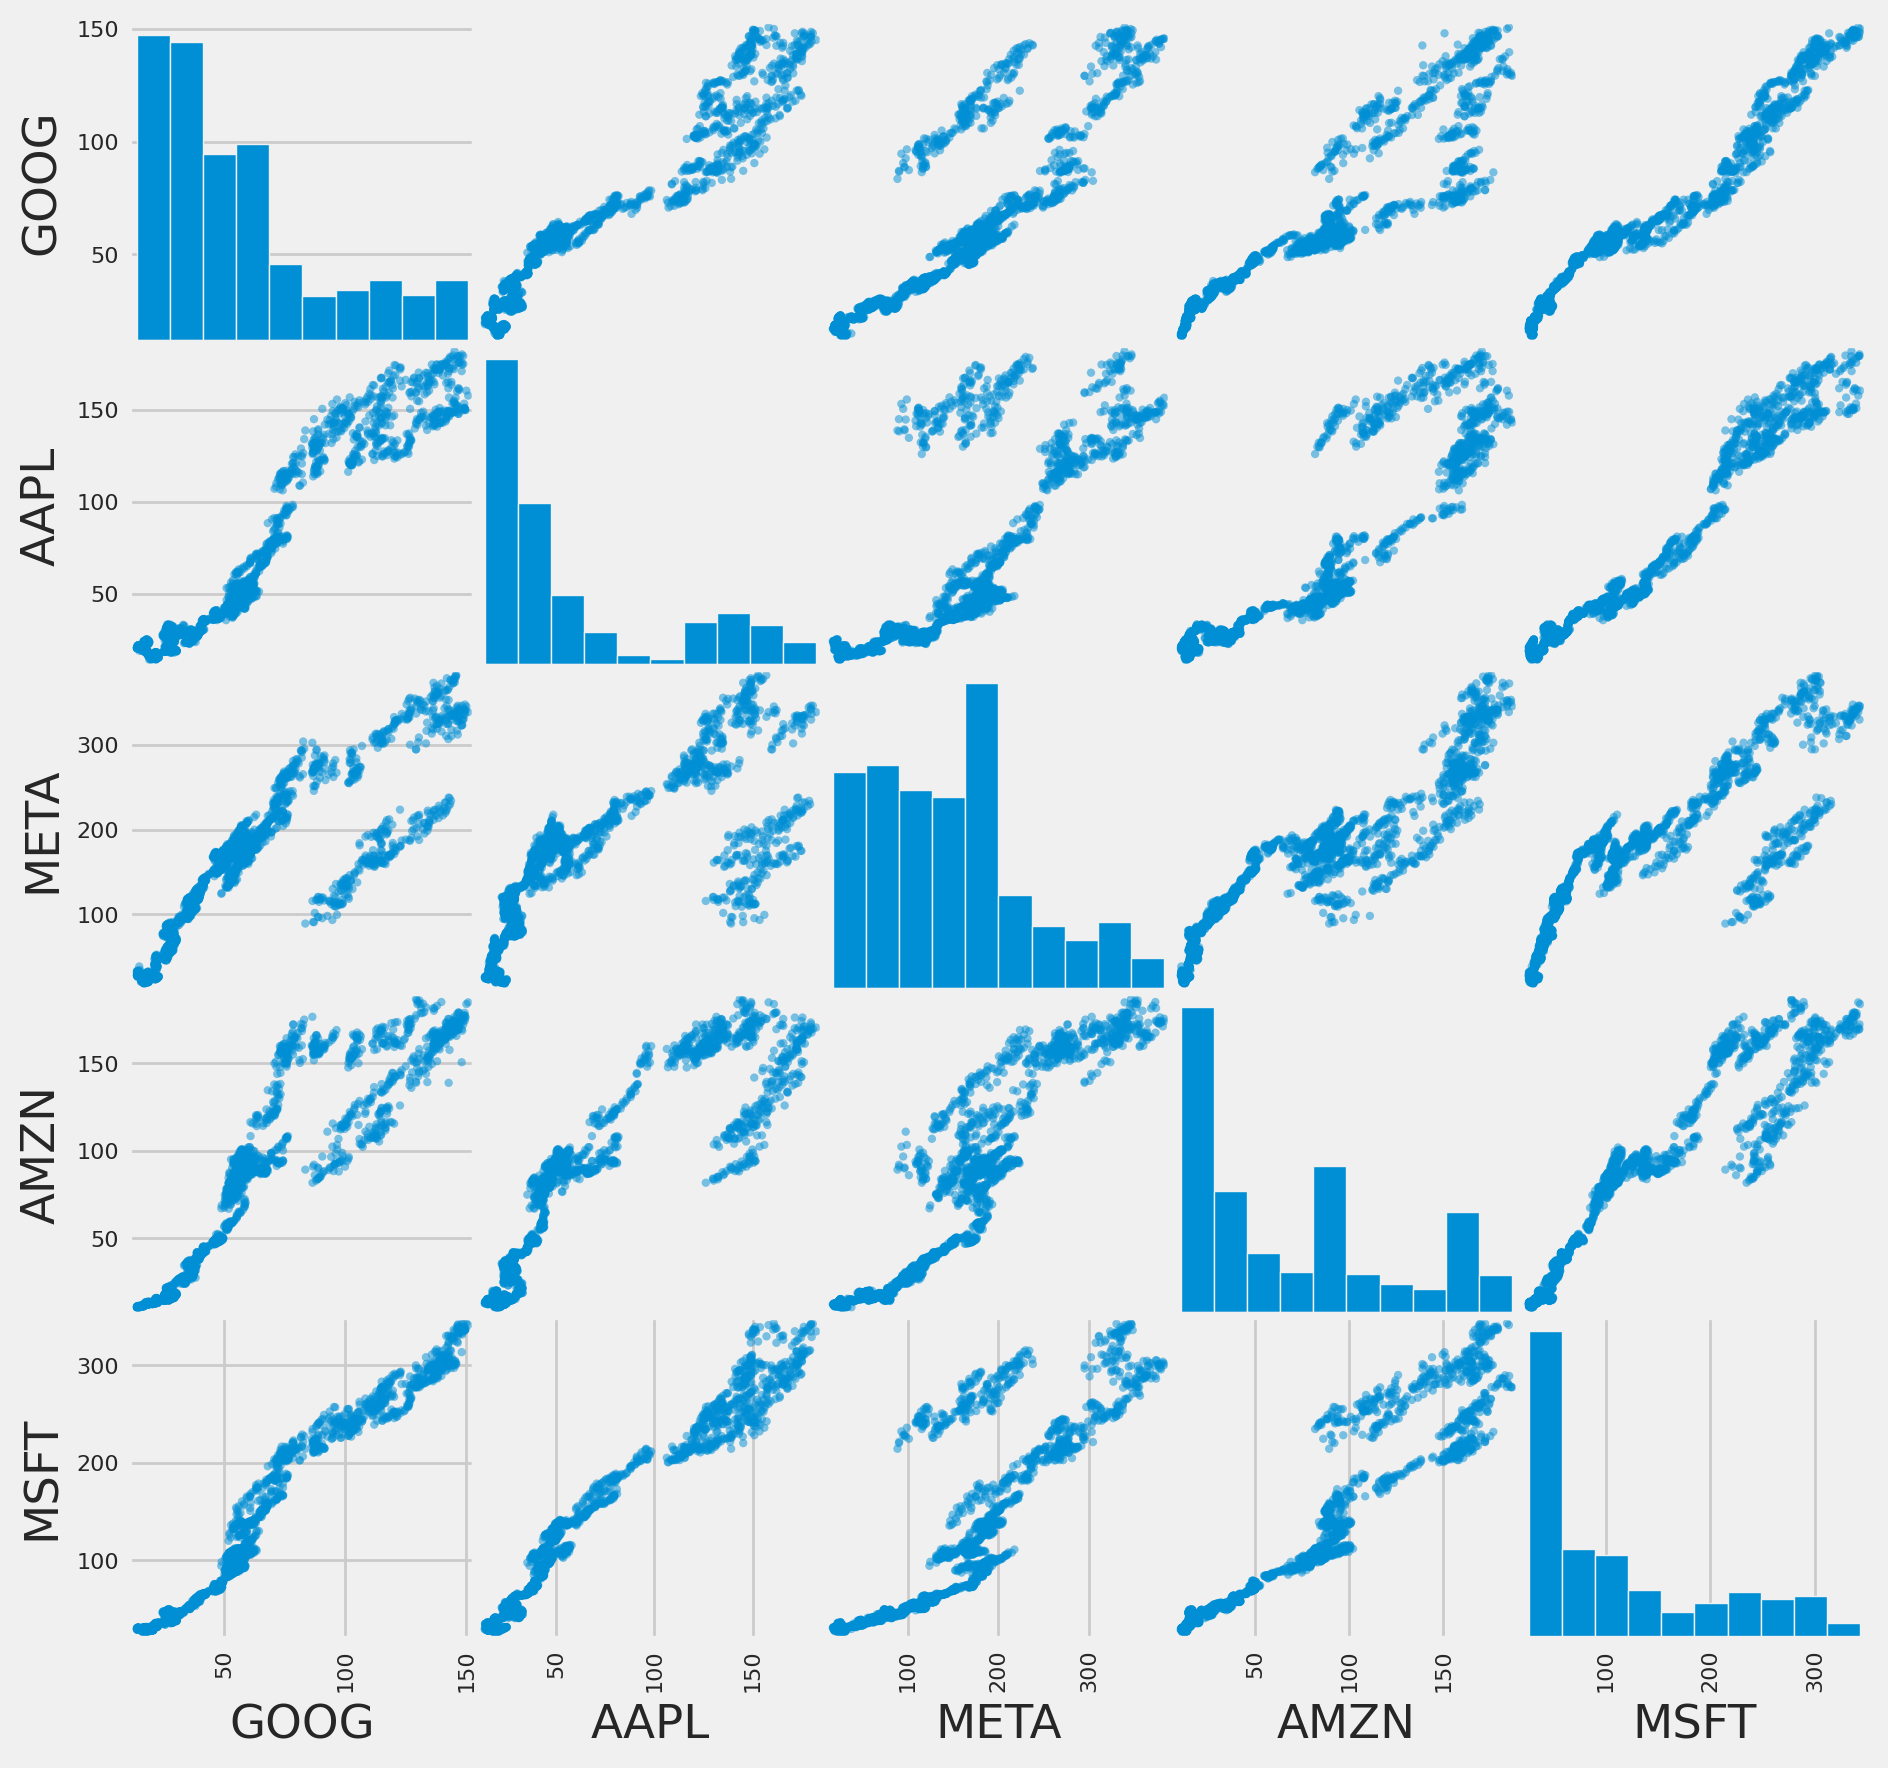

In [37]:
#dataset.hist(figsize=(10,10))
pd.plotting.scatter_matrix(dataset[['GOOG','AAPL','META','AMZN','MSFT']], figsize=(10,10))
plt.show()

> The stock market distributions for Facebook, Apple, and Google exhibit a correct skewed pattern, indicating potential outliers or extreme values in the data.

## Visualization of the closing prices evolution of each company

In [39]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)

In [40]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of GAFAM')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GOOG'], 'red', label='Google')
plt.plot(dataset['AAPL'], 'black', label='Apple')
plt.plot(dataset['META'], 'blue', label='Facebook')
plt.plot(dataset['AMZN'], 'orange', label='Amazon')
plt.plot(dataset['MSFT'], 'green', label='Microsoft')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GSPC'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

The stock prices of GAFAM companies (Google, Apple, Facebook, Amazon, and Microsoft) increased until the COVID-19 crisis in early 2020, followed by a recovery and subsequent fluctuations. Notably, Facebook experienced a significant drop in its stock price during this period.

## Standard risk measure: Volatility (Returns)



Volatility is a standard risk measure that assesses the price fluctuations and stability of financial assets. The stock prices of GAFAM companies (Google, Apple, Facebook, Amazon, and Microsoft) are known for their dynamic and often volatile nature, driven by rapid technological advancements and market disruptions. This higher volatility reflects the risks associated with investing in these companies. On the other hand, the S&P 500, a broad market index representing 500 large-cap US companies, generally experiences lower volatility due to its diversified nature. However, during periods of market turbulence, the S&P 500 can also exhibit increased volatility. Understanding and considering volatility is crucial for investors to evaluate risk and make informed investment decisions.

### Create a new columns in Dataset - Returns




The formula for Simple Return is a basic calculation that measures the percentage change in the value of an investment over a given period.

**Simple Return**
$$r_t=\frac{P_t-P_{t-1}}{P_{t-1}}$$

In [ ]:
#Create a new columns Return in the dataset for each company's
dataset['R_GOOG'] = dataset[['GOOG']].pct_change(1)
dataset['R_AAPL'] = dataset[['AAPL']].pct_change(1)
dataset['R_META'] = dataset[['META']].pct_change(1)
dataset['R_AMZN'] = dataset[['AMZN']].pct_change(1)
dataset['R_MSFT'] = dataset[['MSFT']].pct_change(1)
dataset['R_GSPC'] = dataset[['GSPC']].pct_change(1)
dataset.head

<bound method NDFrame.head of                  GOOG        AAPL        META       AMZN        MSFT  \
Date                                                                   
2012-05-18  14.953949   18.942142   38.230000  10.692500   29.270000   
2012-05-21  15.295419   20.045713   34.029999  10.905500   29.750000   
2012-05-22  14.963912   19.891787   31.000000  10.766500   29.760000   
2012-05-23  15.179603   20.377144   32.000000  10.864000   29.110001   
2012-05-24  15.035145   20.190001   33.029999  10.762000   29.070000   
...               ...         ...         ...        ...         ...   
2022-12-23  89.809998  131.860001  118.040001  85.250000  238.729996   
2022-12-27  87.930000  130.029999  116.879997  83.040001  236.960007   
2022-12-28  86.459999  126.040001  115.620003  81.820000  234.529999   
2022-12-29  88.949997  129.610001  120.260002  84.180000  241.009995   
2022-12-30  88.730003  129.929993  120.339996  84.000000  239.820007   

                   GSPC    R_GOOG

In [ ]:
dataset.describe()

GOOG         AAPL         META         AMZN         MSFT  \
count  2673.000000  2673.000000  2673.000000  2673.000000  2673.000000   
mean     56.827974    60.044056   147.991912    70.188333   116.448706   
std      35.578551    48.235577    86.999128    53.709630    89.866126   
min      13.924059    13.947500    17.730000    10.411000    26.370001   
25%      28.241163    24.965000    77.830002    18.938499    44.830002   
50%      47.955502    38.867500   142.279999    49.758499    74.190002   
75%      71.591003    79.722504   191.289993   100.495003   183.429993   
max     150.709000   182.009995   382.179993   186.570496   343.109985   

              GSPC       R_GOOG       R_AAPL       R_META       R_AMZN  \
count  2672.000000  2672.000000  2672.000000  2672.000000  2672.000000   
mean   2664.863458     0.000809     0.000889     0.000751     0.000978   
std     903.913123     0.016898     0.018314     0.025274     0.020336   
min    1278.040039    -0.111008    -0.128647    -0.263901    -0.140494   
25%    1989.614990    -0.006764    -0.007677    -0.010112    -0.008609   
50%    2473.640015     0.000688     0.000671     0.000870     0.000916   
75%    3199.482544     0.008903     0.010434     0.012629     0.011109   
max    4796.560059     0.160524     0.119808     0.296115     0.141311   

            R_MSFT       R_GSPC  
count  2672.000000  2672.000000  
mean      0.000930     0.000467  
std       0.016856     0.010953  
min      -0.147390    -0.119841  
25%      -0.006850    -0.003640  
50%       0.000681     0.000594  
75%       0.009257     0.005426  
max       0.142169     0.093828

In [ ]:
# Daily volatility (in %) of each stock
dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].std()

R_GOOG    0.016898
R_AAPL    0.018314
R_META    0.025274
R_AMZN    0.020336
R_MSFT    0.016856
R_GSPC    0.010953
dtype: float64

 > The descriptive statistics table provides valuable insights into the risk levels of each stock, as represented by their standard deviations. Among the stocks analysed, Facebook exhibits the highest level of risk with a standard deviation of $2.58\%$, indicating relatively more significant price fluctuations and potential volatility. Following Facebook, Amazon shows a lower but still significant level of risk with a standard deviation of $2.03\%$.

 > Comparatively, the risk associated with the S&P 500 market is relatively lower, as indicated by its standard deviation of $1.1\%$. This suggests that, on average, the individual stocks of Facebook and Amazon carry higher risks than the overall market represented by the S&P 500. These findings highlight the importance of considering risk factors when making investment decisions. Investors may opt to allocate their portfolio based on their risk appetite, taking into account the higher risk associated with specific stocks such as Facebook and Amazon compared to the broader market.

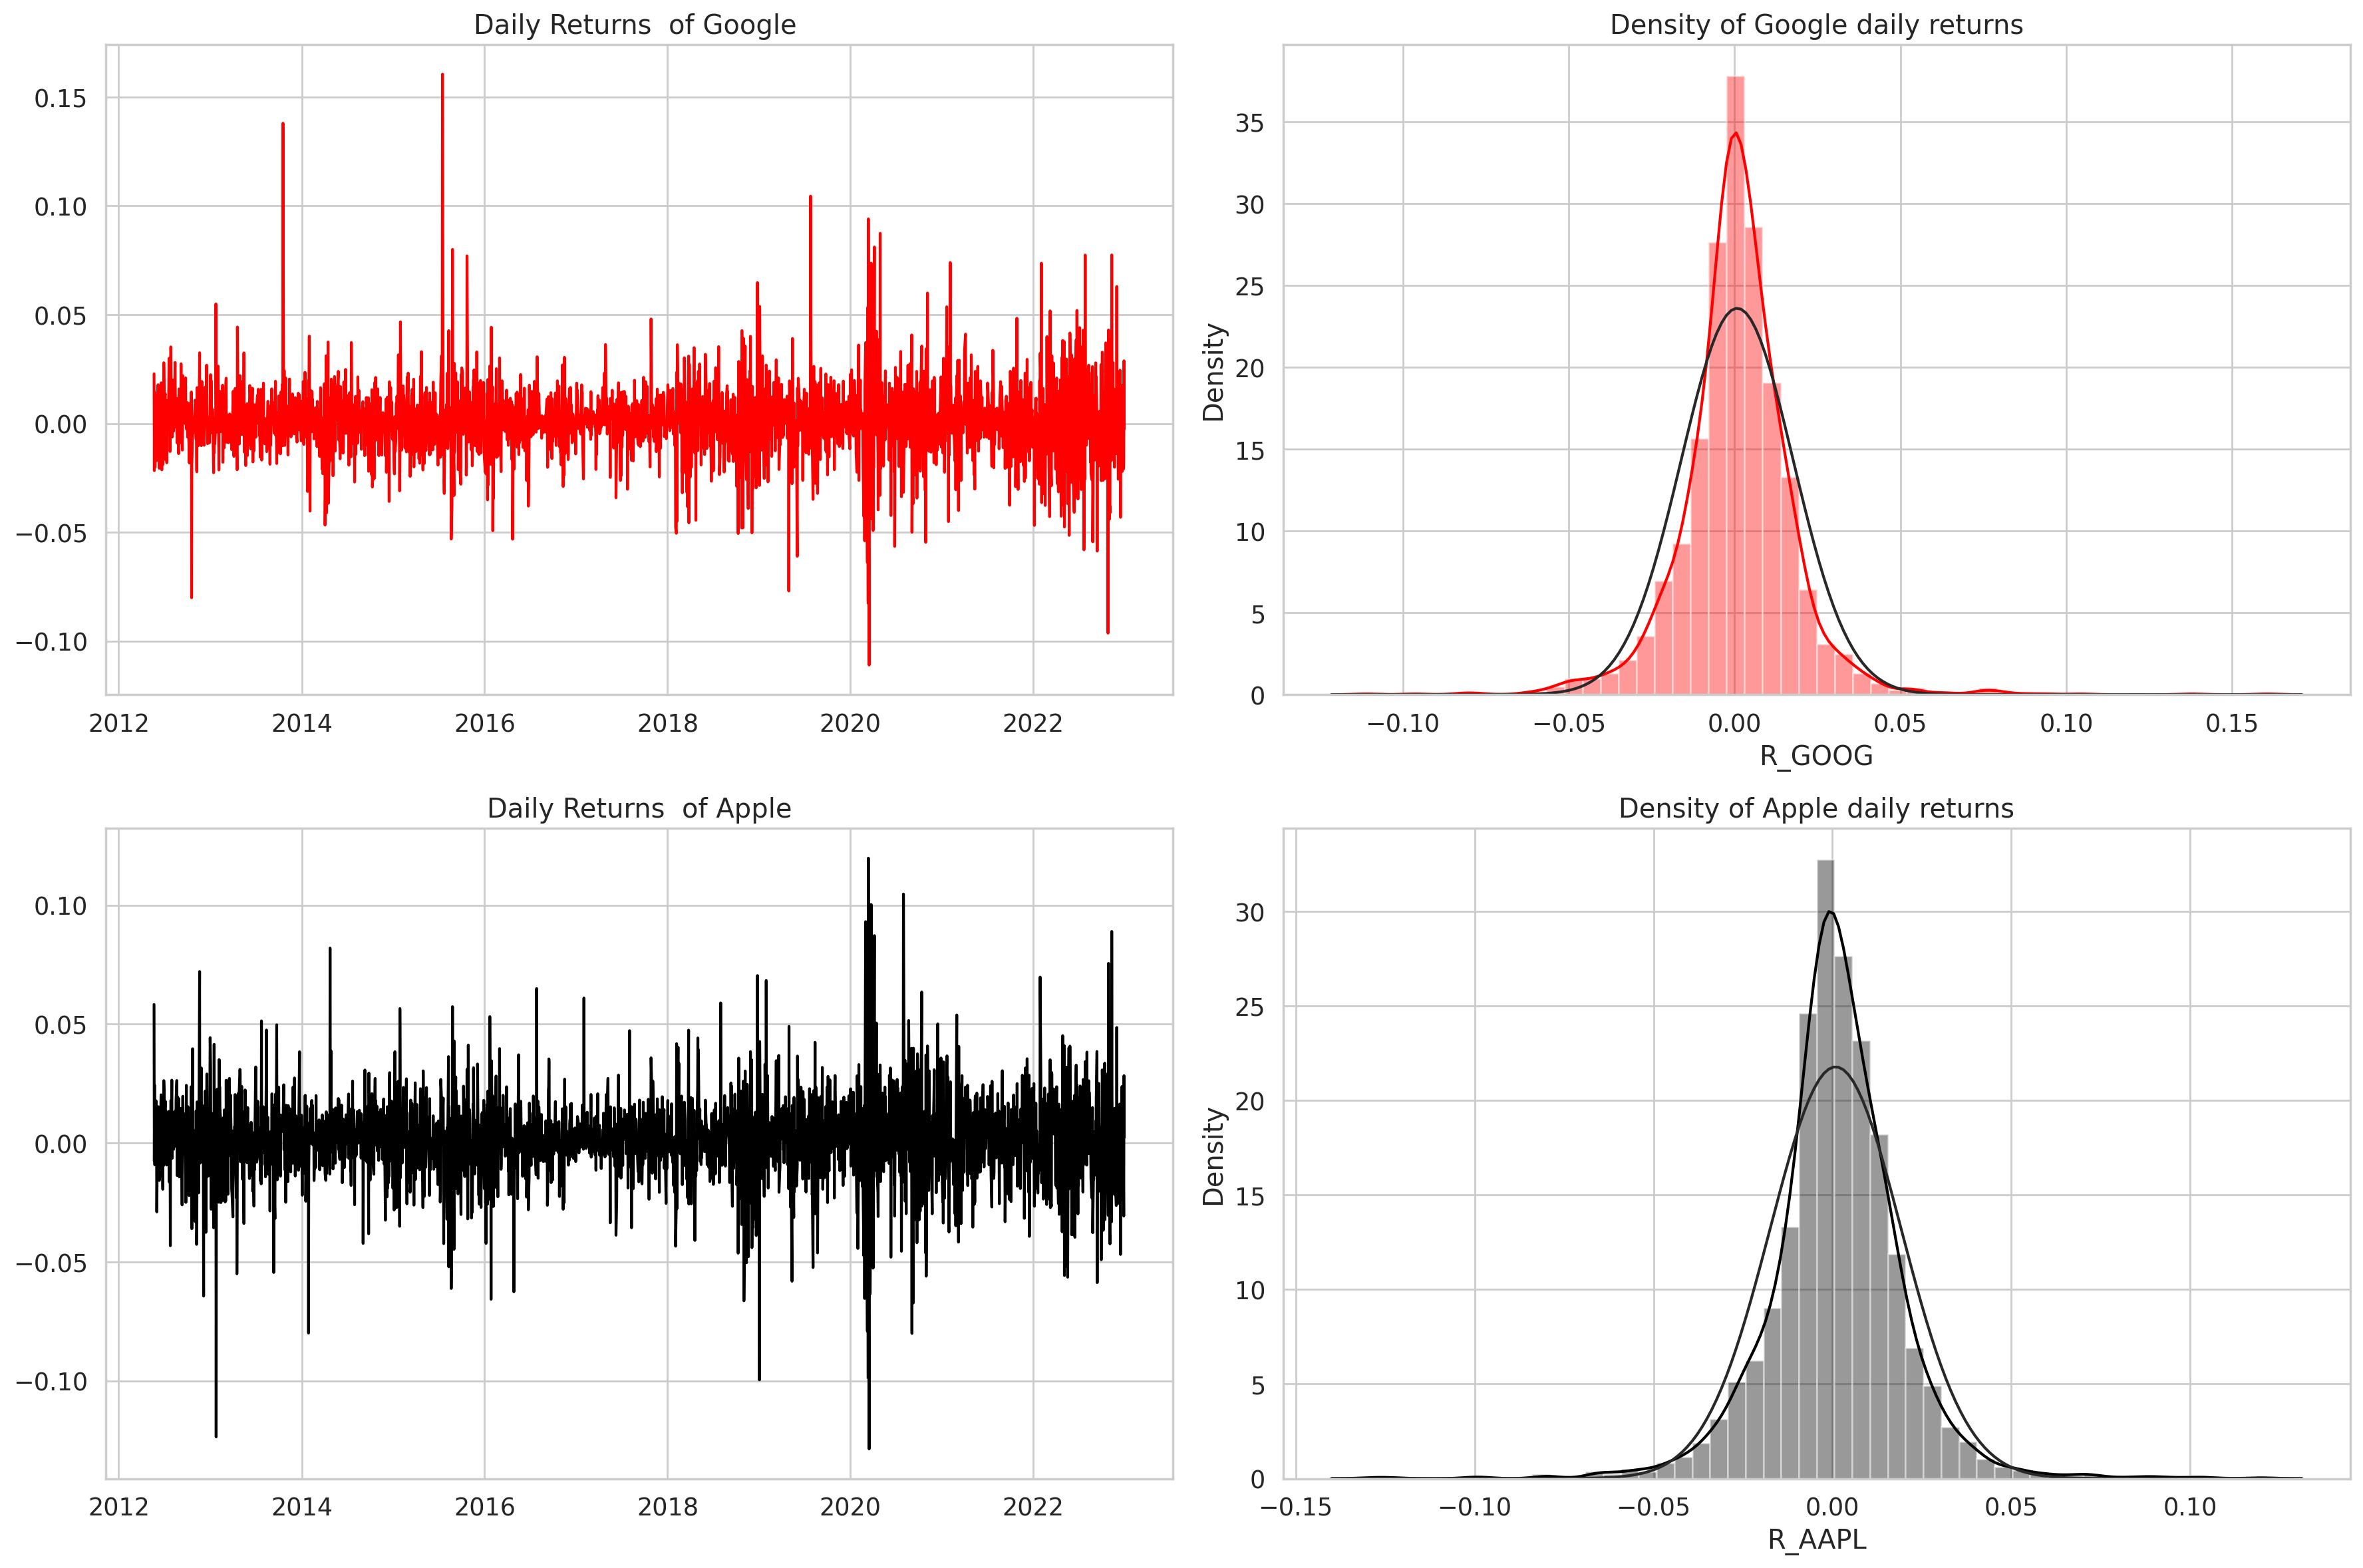

In [ ]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_GOOG'], color='red')
    axes[0][0].set_title('Daily Returns  of Google ')

    sns.distplot(dataset['R_GOOG'], norm_hist=True, fit=stats.norm, color='red',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Google daily returns')

    axes[1][0].plot(dataset['R_AAPL'], color='black')
    axes[1][0].set_title('Daily Returns  of Apple')

    sns.distplot(dataset['R_AAPL'], norm_hist=True, fit=stats.norm, color='black',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Apple daily returns')
    plt.tight_layout()
    fig.show();

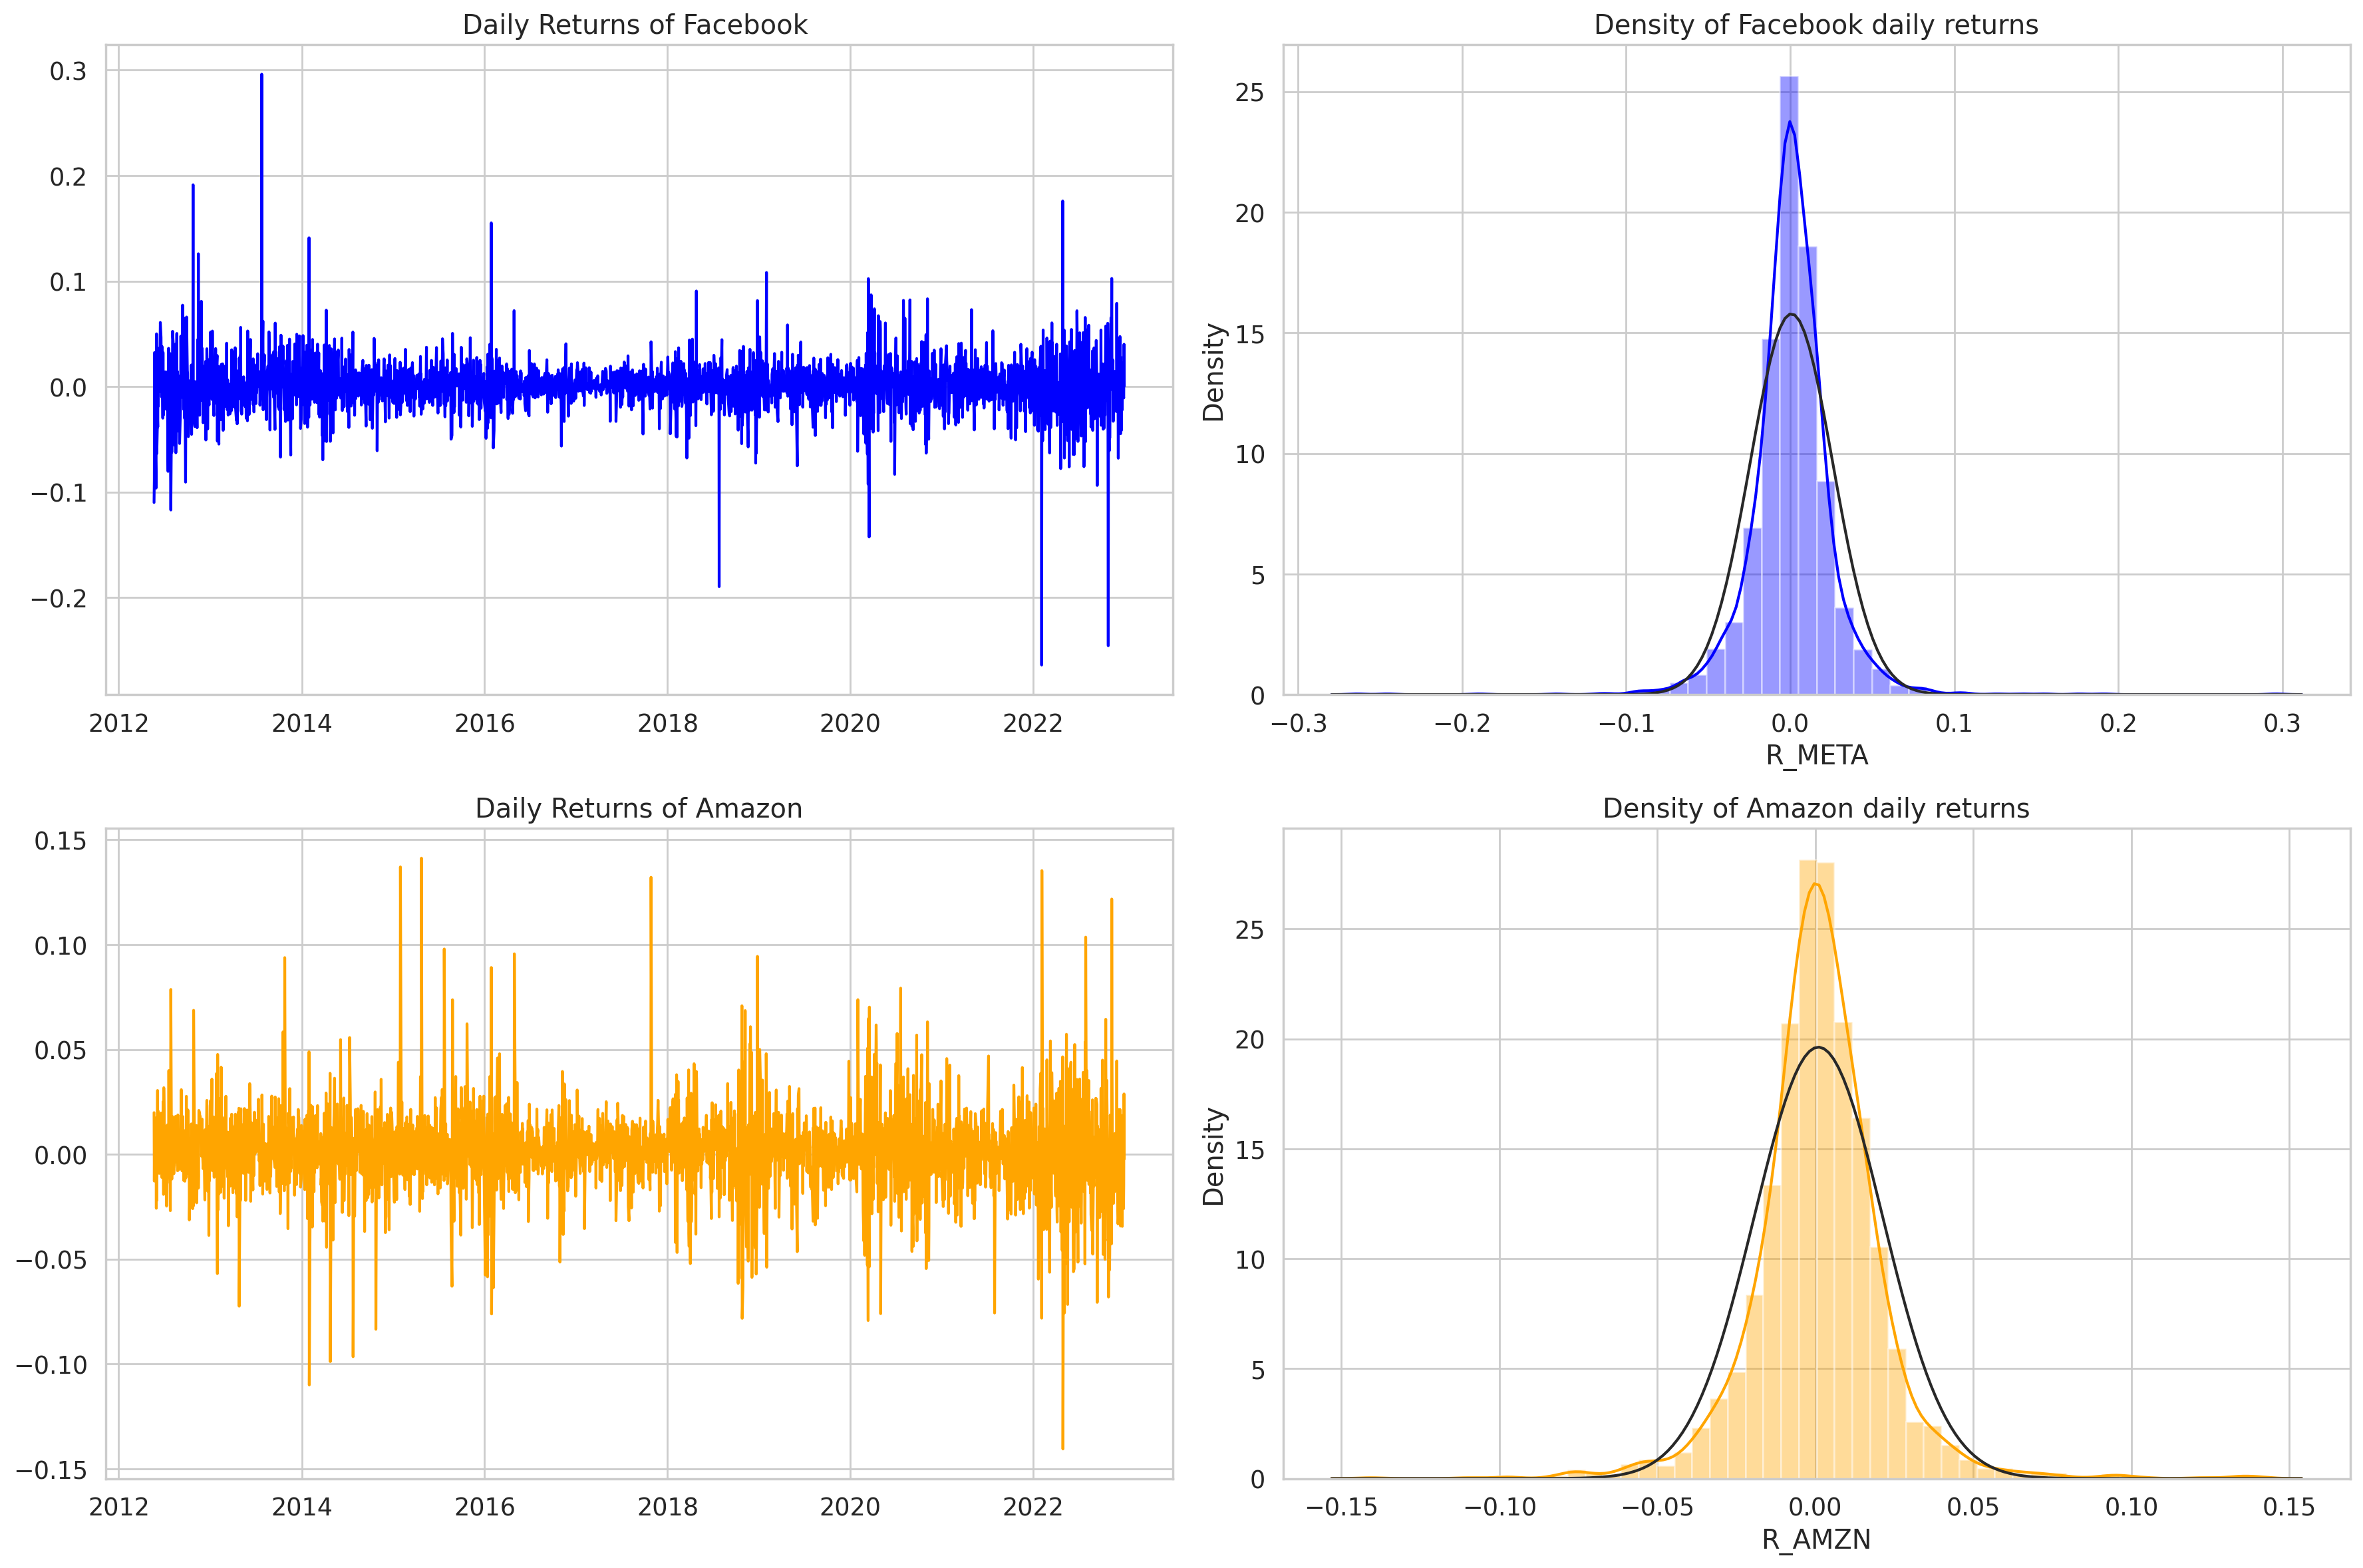

In [ ]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_META'], color='blue')
    axes[0][0].set_title('Daily Returns of Facebook ')

    sns.distplot(dataset['R_META'], norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Facebook daily returns')

    axes[1][0].plot(dataset['R_AMZN'], color='orange')
    axes[1][0].set_title('Daily Returns of Amazon')

    sns.distplot(dataset['R_AMZN'], norm_hist=True, fit=stats.norm, color='orange',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Amazon daily returns')
    plt.tight_layout()
    fig.show();

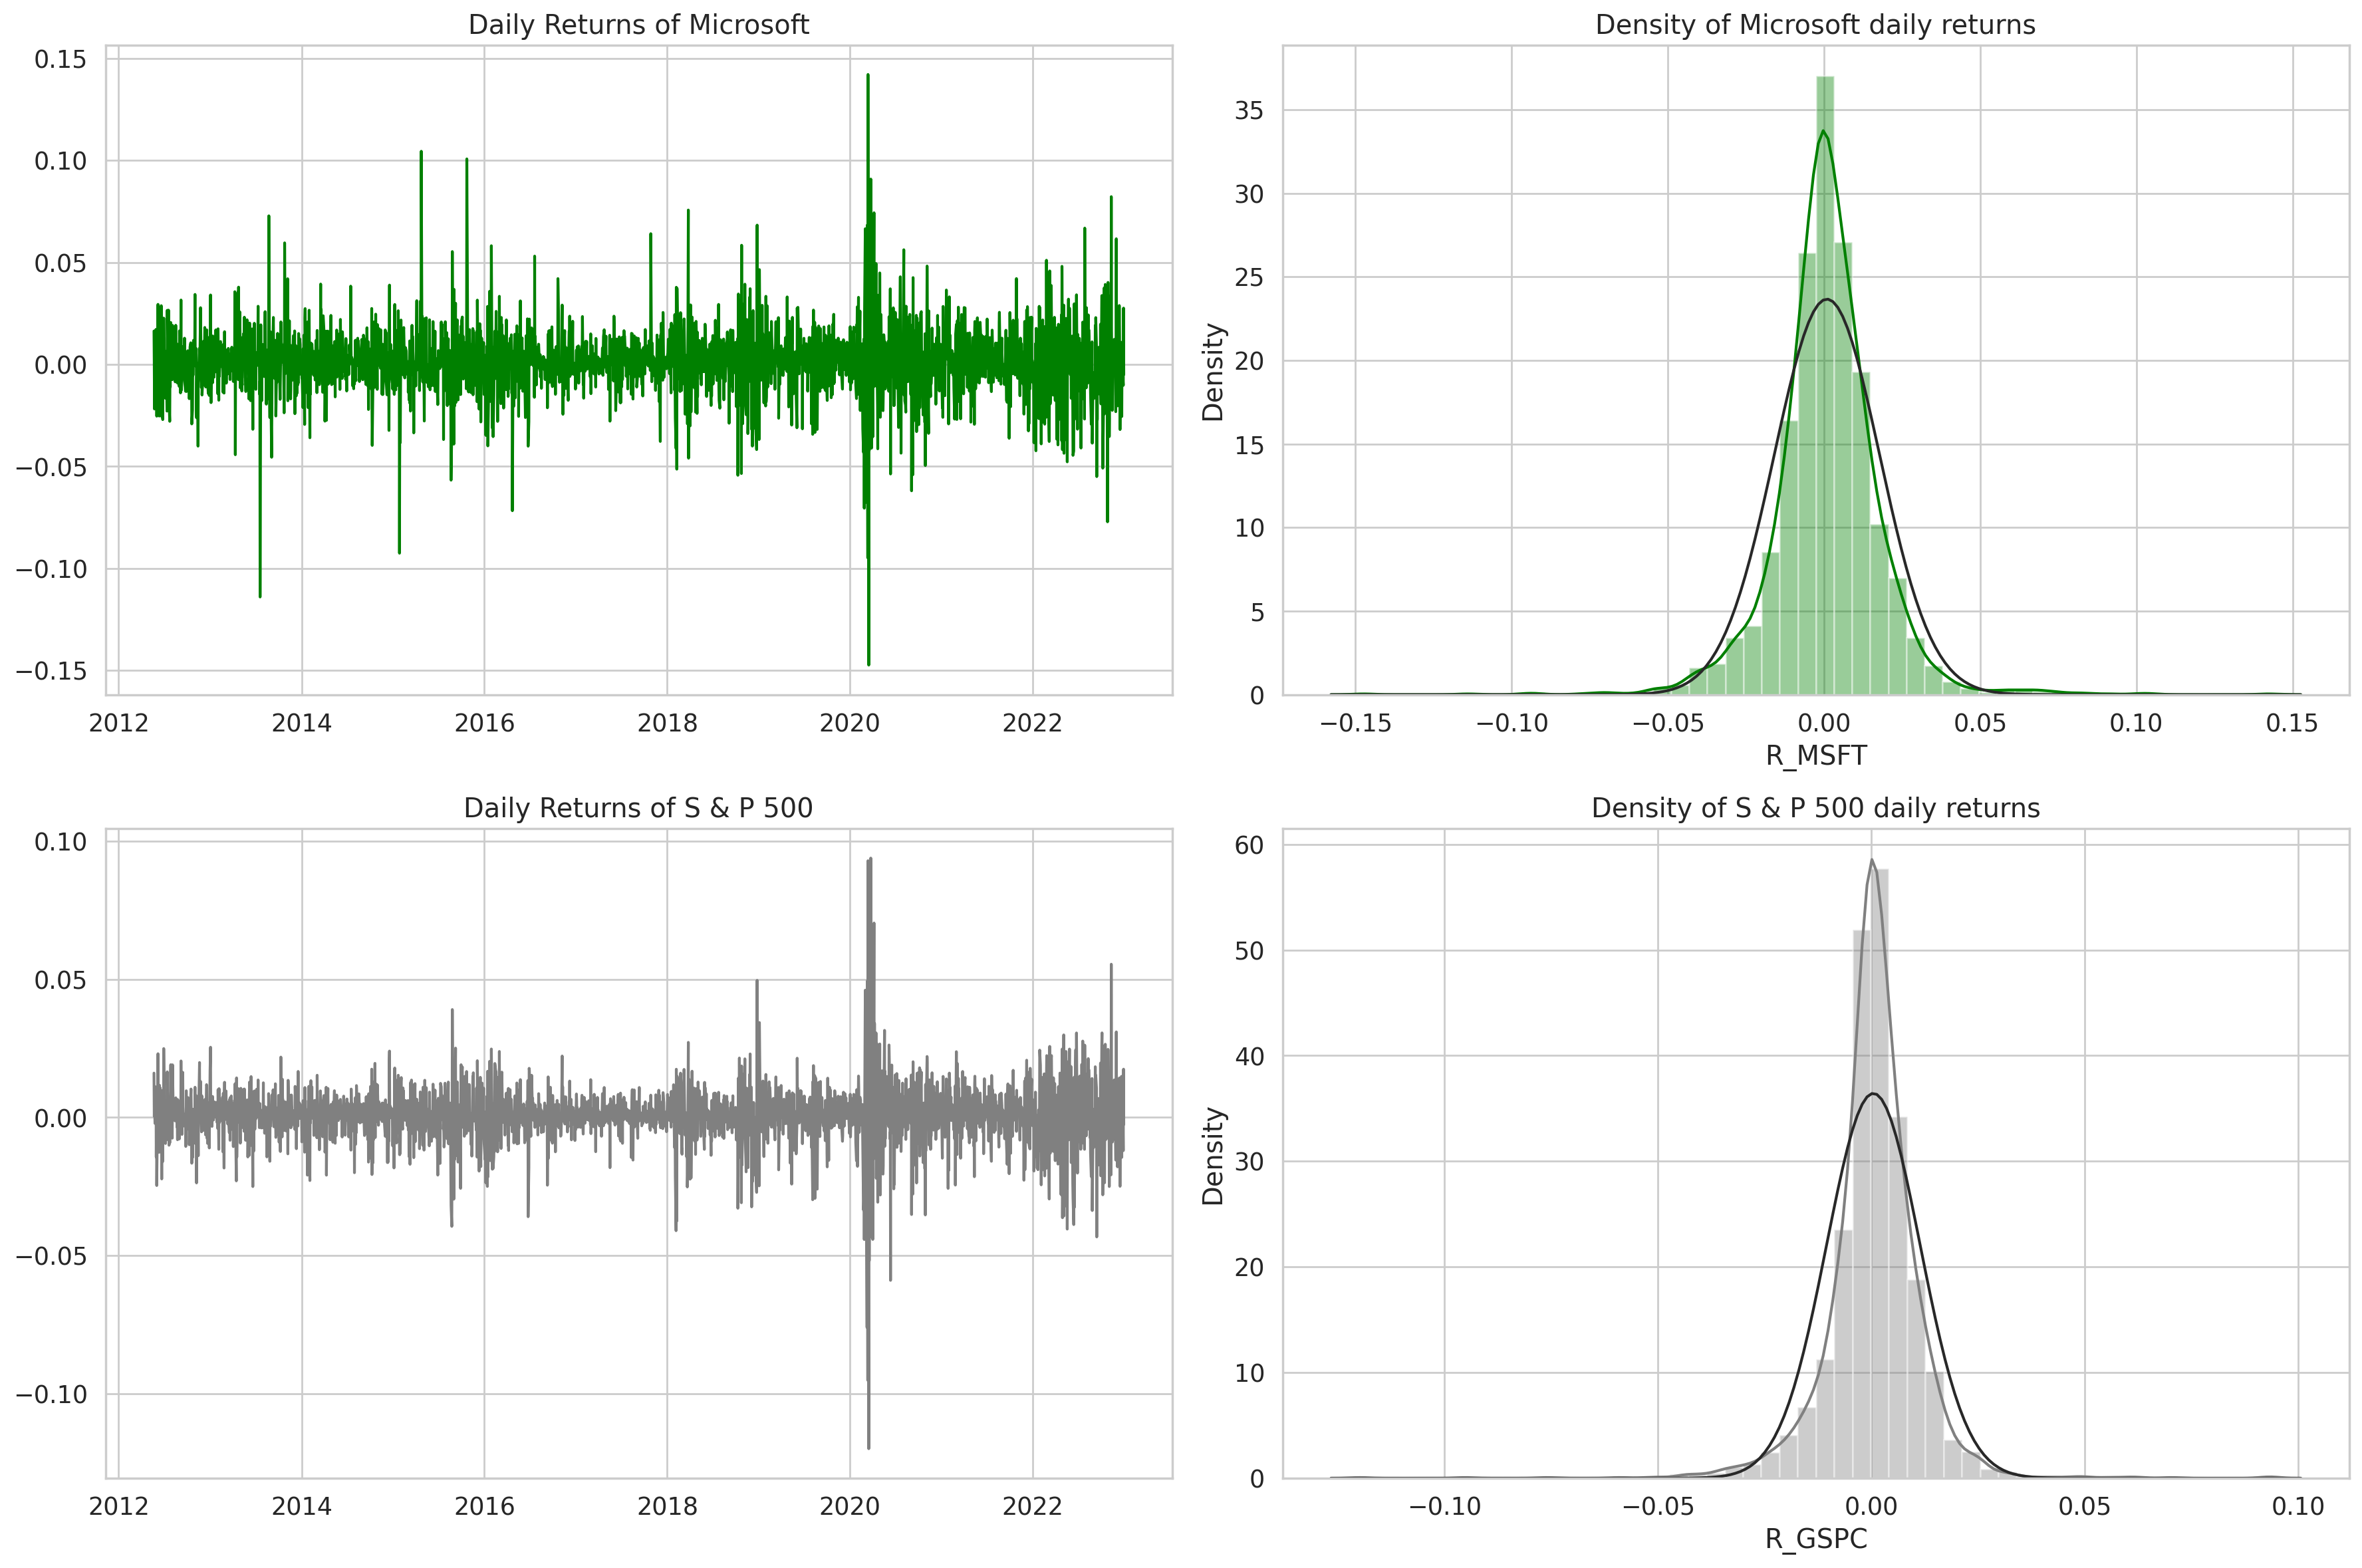

In [ ]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_MSFT'], color='green')
    axes[0][0].set_title('Daily Returns of Microsoft')

    sns.distplot(dataset['R_MSFT'], norm_hist=True, fit=stats.norm, color='green',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Microsoft daily returns')
    
    axes[1][0].plot(dataset['R_GSPC'], color='grey')
    axes[1][0].set_title('Daily Returns of S & P 500')

    sns.distplot(dataset['R_GSPC'], norm_hist=True, fit=stats.norm, color='grey',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of S & P 500 daily returns')
    plt.tight_layout()
    fig.show();

>  The return graphs indicate periods of high volatility in Microsoft, Apple, Google, and the S&P 500, particularly at the beginning of 2020 due to the COVID-19 crisis. During this time, the stock returns experienced significant fluctuations and increased volatility, reflecting the pandemic's market uncertainty and economic impact.

> Apart from these volatile periods, the density of returns for each company appears to be symmetric around the origin, suggesting a balanced distribution of positive and negative returns. Additionally, the returns of each company exhibit a pattern that closely follows a normal distribution. This implies on average, the returns of these stocks tend to cluster near the mean value, with fewer extreme outliers.

> Understanding the volatility and distribution of returns is crucial for investors as it provides insights into the potential risks and rewards associated with investing in these companies. It enables investors to evaluate historical performance and make informed decisions based on risk appetite and return expectations.

# Portfolio Optimization using Efficient Frontier

Portfolio Optimization using the Efficient Frontier is a powerful approach to construct an optimal investment portfolio by considering the stock prices of GAFAM companies (Google, Apple, Facebook, Amazon, and Microsoft) and the S&P 500. The Efficient Frontier is a graphical representation that illustrates the trade-off between risk and return for different portfolio allocations. By analyzing the historical data and expected returns of these stocks, along with their correlations, portfolio optimization techniques can help investors identify the optimal combination of assets that maximize returns for a given level of risk or minimize risk for a desired level of return. This approach allows investors to make well-informed decisions, diversify their investments, and potentially achieve higher returns while managing risk effectively in the context of these prominent tech companies and the broader market represented by the S&P 500.

### Correlation coefficients between companies' close prices

The correlation coefficients between the close prices of Google, Apple, Facebook, Amazon, Microsoft, and the S&P 500 provide insights into the degree of linear relationship between the individual stock prices and the overall market. These coefficients quantify the strength and direction of the relationship, helping investors understand the level of synchronisation or divergence between these companies' stocks and the broader market.

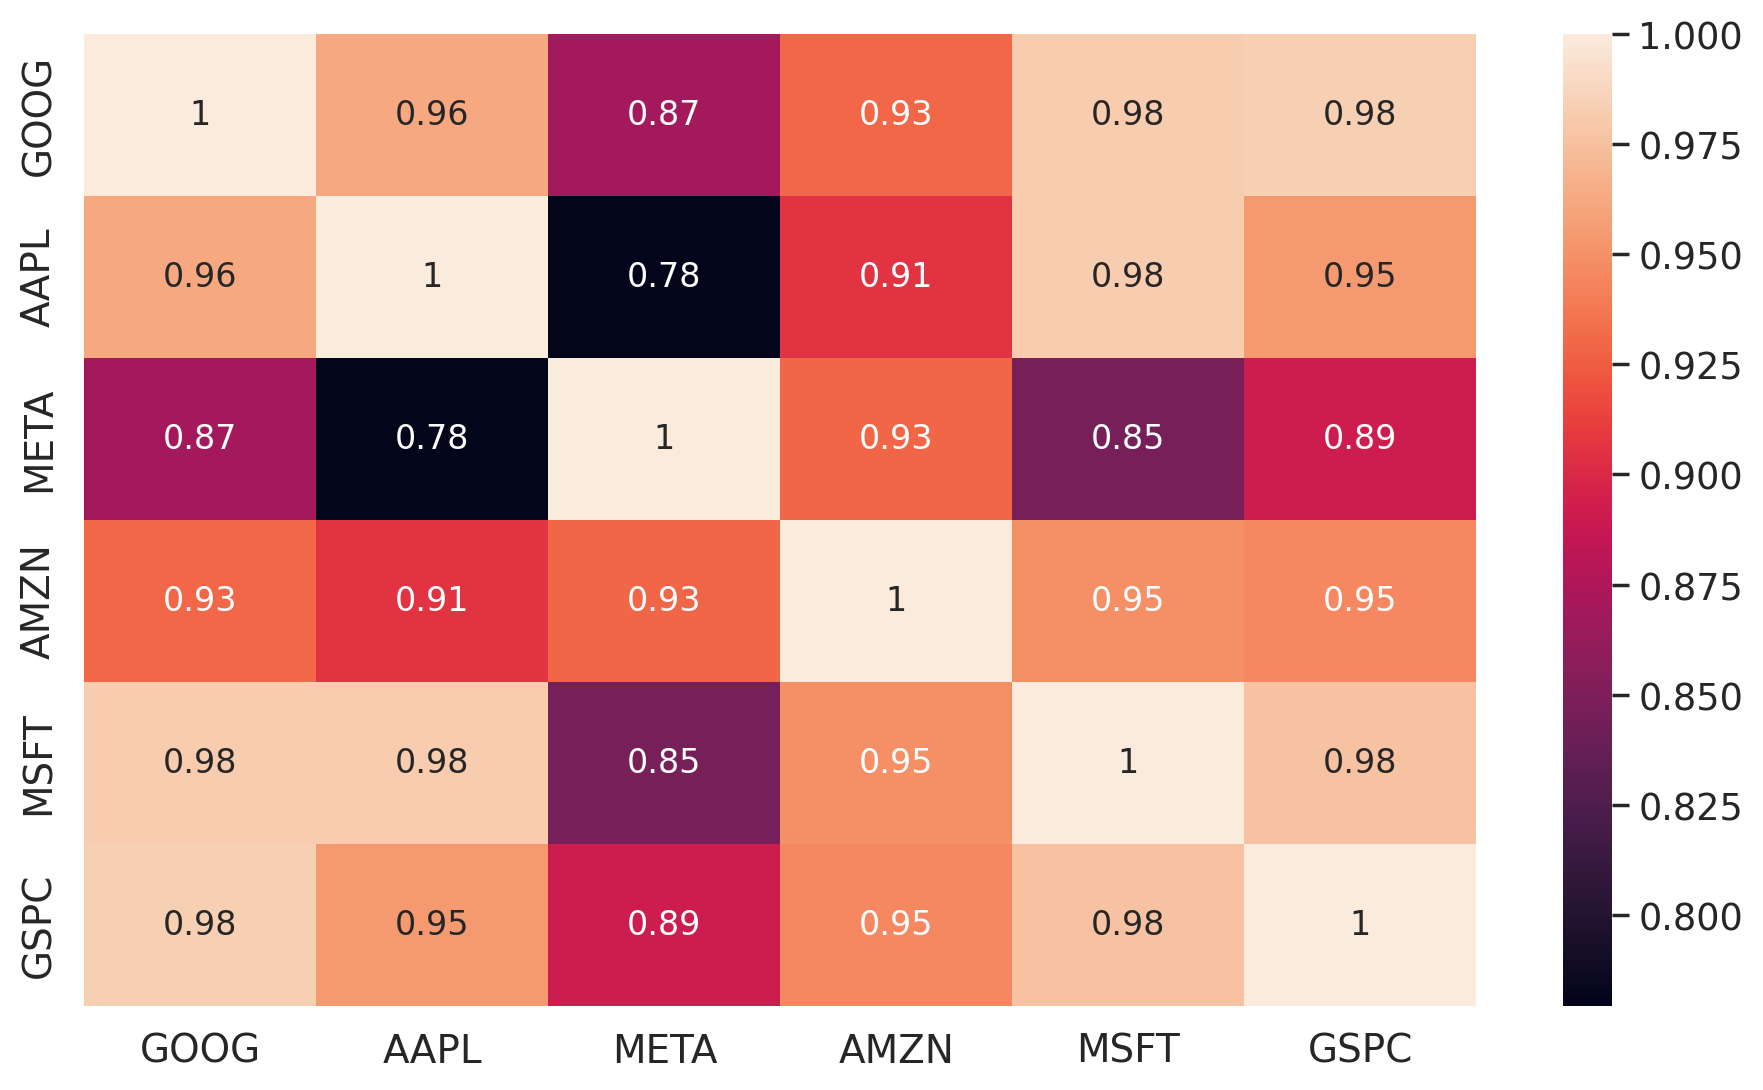

In [ ]:
corr = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

> The correlation map of daily prices reveals strong positive correlations between the S&P 500 and Microsoft and Amazon and between Microsoft and Google, Google and Apple, and Amazon and Microsoft. These correlations indicate a tendency for the stock prices of these companies to move in a similar direction, highlighting potential interdependencies and providing insights for portfolio diversification strategies.

### Correlation coefficients between companies' returns

The correlation coefficients between the returns of Google, Apple, Facebook, Amazon, Microsoft, and the S&P 500 provide a measure of the interdependence or independence of these companies' returns concerning the broader market, aiding investors in assessing the diversification potential and risk associated with including these stocks in their portfolios.

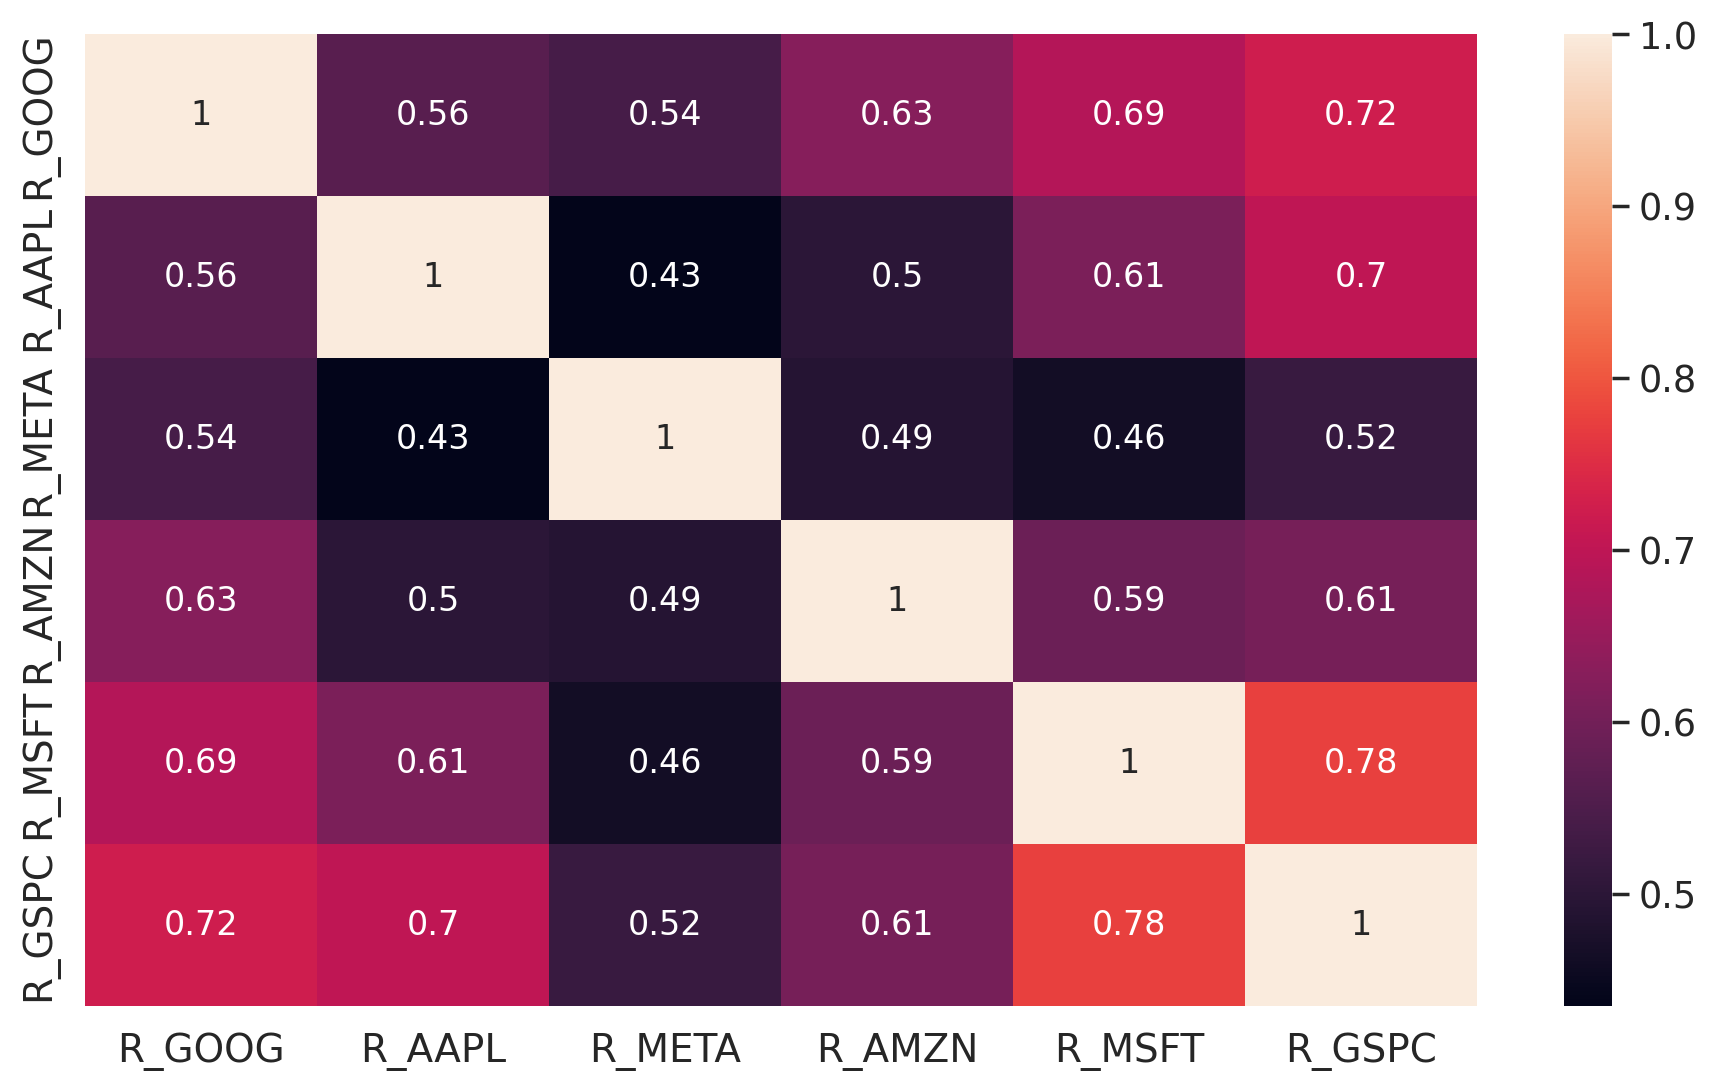

In [ ]:
corr = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

> The correlation map of returns prices demonstrates a strong positive correlation between the returns of the S&P 500 and the returns of Microsoft. This indicates a tendency for the two to move in a similar direction, suggesting that overall market performance changes influence Microsoft's stock returns. 

*  $$\mbox{Annualized Volatility} = \mbox{Daily Volatility}_i \times \sqrt{252}= \mbox{Returns}_i\times \sqrt{252},$$
$$\;\;\;\;i=\{\mbox{GOOG}, \mbox{AAPL}, \mbox{META}, \mbox{AMZN}, \mbox{MSFT}, \mbox{GSPC} \}$$



*  $$\mbox{Monthly volatility} = \mbox{Daily Volatility}_i \times \sqrt{21}= \mbox{Returns}_i\times \sqrt{21},$$
$$\;\;\;\;i=\{\mbox{GOOG}, \mbox{AAPL}, \mbox{META}, \mbox{AMZN}, \mbox{MSFT}, \mbox{GSPC} \}$$


**Note**: There are 252 trading days per year and 21 trading days per month.

In [ ]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_GOOG = 26.82 % per year
The volatility of the stock of R_AAPL = 29.07 % per year
The volatility of the stock of R_META = 40.12 % per year
The volatility of the stock of R_AMZN = 32.28 % per year
The volatility of the stock of R_MSFT = 26.76 % per year
The volatility of the stock of R_GSPC = 17.39 % per year


We can see that the annual volatility of Meta ($41.01\%$) is higher than the other stocks.

In [ ]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_GOOG = 7.74 % per month
The volatility of the stock of R_AAPL = 8.39 % per month
The volatility of the stock of R_META = 11.58 % per month
The volatility of the stock of R_AMZN = 9.32 % per month
The volatility of the stock of R_MSFT = 7.72 % per month
The volatility of the stock of R_GSPC = 5.02 % per month


We can see that Meta's monthly volatility ($11.84\%$) is still higher than other stocks.

> Meta exhibits higher annual volatility ($41.01\%$) than the other stocks, indicating more significant price fluctuations and potential risk. Even every month, Meta's volatility ($11.84\%$) remains higher than the other stocks, suggesting higher price swings.

## Sharpe ratio

The Sharpe ratio measures the risk-adjusted return for companies like Google, Apple, Facebook, Amazon, Microsoft, and the S&P 500. By comparing their respective Sharpe ratios, we can assess the efficiency of each investment in generating returns relative to the level of risk. A higher Sharpe ratio indicates better risk-adjusted performance, implying that the acquisition provides higher returns for the risk taken. Analysing the Sharpe ratios of these companies and comparing them to the S&P 500 helps investors evaluate each investment option's relative attractiveness in balancing risk and return.

It is calculated by the formula below:

$$\mbox{Sharpe ratio}=\frac{R_p-R_f}{\sigma_p}$$

*  $R_p$ = Return of portfolio.

* $R_f$ = Risk-Free rate.

* $\sigma_p$ = Standard deviation of portfolio's excess return.


In [ ]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf  ) / volatility
    return sharpe

In [ ]:
# Let's consider a risk-free investment with an annual return of 2.5% and 
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_GOOG = 0.67
The Sharpe ratio of, R_AAPL = 0.68
The Sharpe ratio of, R_META = 0.41
The Sharpe ratio of, R_AMZN = 0.69
The Sharpe ratio of, R_MSFT = 0.78
The Sharpe ratio of, R_GSPC = 0.53


**Interpretation of the Sharpe Ratio**

The Sharpe ratio gives the excess return of a stock (or a portfolio) per unit of risk.

* The Sharpe ratio of the S\&P500 is equal to 0.53. Given a unit of risk, the S\&P500 has an excess annual return of $53\%$ compared to a risk-free investment with an annual return of $2.5\%$.

*  For the same unit of risk, Microsoft has an annual excess return of $78\%$ compared to a risk-free investment with an annual return of $2.5\%$.

Under these conditions, the best stock is Microsoft because it has the highest Sharpe ratio.

> The Sharpe ratio is a valuable metric for assessing the risk-adjusted performance of stocks or portfolios. In the case of the S&P 500, its Sharpe ratio is calculated to be 0.53. This implies that for a given unit of risk, the S&P 500 generates an excess annual return of $53\%$ compared to a risk-free investment with an annual return of $2.5\%$.

> When considering Microsoft, its Sharpe ratio indicates an annual excess return of $78\%$ for the same level of risk. This means that Microsoft has the potential to generate significantly higher returns relative to the risk-free investment compared to the S&P 500.

> Based on these findings, it can be concluded that Microsoft exhibits the highest Sharpe ratio among the stocks analysed. This indicates that, for a given level of risk, Microsoft has the potential to provide the best risk-adjusted returns. Therefore, regarding the Sharpe ratio, Microsoft is the most favourable stock choice among the options considered.

### Beta of a Security

Beta of the security measures how the given security performs in comparison to market, say S&P 500 (if you are calculating US Stock. Generally, each country has some index which represent the market). Beta tells the following,

* $\beta = 0$ No relation to the market (i.e S\&P500).

* $\beta = 1$ Performs same as the market.

* $\beta<1$ Lose less in recession and makes less in flourishing economy.

* $\beta>1$  Lose more in recession and makes more in flourinshing economy.

* $\beta<0$  Negatively related to market. That is, if market goes up, security (used interchangeably with stock) goes down and vice versa. Eg. GOLD, SILVER, precious metal etc.

We shall, try to find Beta for tesla. To find beta one usually, considers last 5 year data with monthly period.

Can be calculated as follows:

$$\beta=\frac{\mbox{Cov}(\mbox{Stock}_i, S\&P)}{\mbox{Var}(S\&P)}$$

Where, $i=\mbox{GOOG}, \mbox{AAPL}, \mbox{META}, \mbox{AMZN}, \mbox{MSFT}$
 


In [ ]:
cov = returns.cov() * 12 # annualized
cov

R_GOOG    R_AAPL    R_META    R_AMZN    R_MSFT    R_GSPC
R_GOOG  0.003426  0.002098  0.002770  0.002577  0.002345  0.001607
R_AAPL  0.002098  0.004025  0.002415  0.002237  0.002270  0.001689
R_META  0.002770  0.002415  0.007665  0.003033  0.002361  0.001728
R_AMZN  0.002577  0.002237  0.003033  0.004962  0.002432  0.001623
R_MSFT  0.002345  0.002270  0.002361  0.002432  0.003410  0.001719
R_GSPC  0.001607  0.001689  0.001728  0.001623  0.001719  0.001440

In [ ]:
beta_GOOG = cov.iloc[0,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Google is : {beta_GOOG}')

Beta (10Y period) of Google is : 1.1160534716689705


In [ ]:
beta_AAPL = cov.iloc[1,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Apple is : {beta_AAPL}')

Beta (10Y period) of Apple is : 1.1730884021546437


In [ ]:
beta_META = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Facebook is : {beta_META}')

Beta (10Y period) of Facebook is : 1.1999789898758675


In [ ]:
beta_AMZN = cov.iloc[3,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Amazon is : {beta_AMZN}')

Beta (10Y period) of Amazon is : 1.1270721570115434


In [ ]:
beta_MSFT = cov.iloc[4,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Microsoft is : {beta_MSFT}')

Beta (10Y period) of Microsoft is : 1.1941077217718155


In [ ]:
beta_GSPC = cov.iloc[5,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of S&P 500 is : {beta_GSPC}')

Beta (10Y period) of S&P 500 is : 1.0


## Portfolio Simulation

> In this Project, we will perform a portfolio simulation for Google, Apple, Facebook, and Amazon, along with the S\&P 500 market index. We are using Python's Scipy.optimize Package. We will generate 2673 portfolios by adjusting the asset allocation. The simulation considers historical returns, volatilities, and correlations to construct efficient portfolios. With a risk-free rate of $0\%$, we will evaluate the portfolios' performance relative to a risk-free investment. The analysis aims to understand diversification benefits and risk reduction, providing insights for constructing well-diversified portfolios aligned with investors' risk tolerance and return objectives.

In [ ]:
from scipy.optimize import minimize

In [ ]:
# Portfolio Simulation 
portfolio        = 2673  # generation of a portfolio
n_assets         = returns.shape[1]
weights          = np.random.dirichlet(np.full(n_assets,0.05),portfolio) 
mean_returns     = returns.mean()
sigma            = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol     = np.zeros(portfolio)
sharpe_ratio     = np.zeros(portfolio)
rf_rate          = 0.0                          # risk free rate 

for i in range(portfolio):
    w                   = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i]     = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i]     = (expected_returns[i]-rf_rate)/expected_vol[i]

In [ ]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T,
                          np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):
    
    return np.sum(mean_returns*weight)*252  

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p    = portfolio_volatility(weight)
    return return_p, vol_p

In [ ]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate         = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():
    
    def sum_one(weight):
        w= weight
        return np.sum(weight)-1
    
    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()    # w0 is an initila guess 
    
    return minimize(negativeSR,w0,method='SLSQP',
                          bounds  =((0,1),)*n_assets,
                      constraints = weight_constraints)

In [ ]:
def min_vol():
    
    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds             = ((0,1),)*n_assets
    
    return minimize(portfolio_volatility,w0,method='SLSQP',
                   bounds      = bounds,
                   constraints = weight_constraints)

In [ ]:
def efficient_portfolio_target(target):
    
    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
                  {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0          = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds      = ((0,1),)*n_assets
    
    return minimize(portfolio_volatility,w0, method = 'SLSQP',
                    bounds      = bounds, 
                    constraints = constraints)

In [ ]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range] 

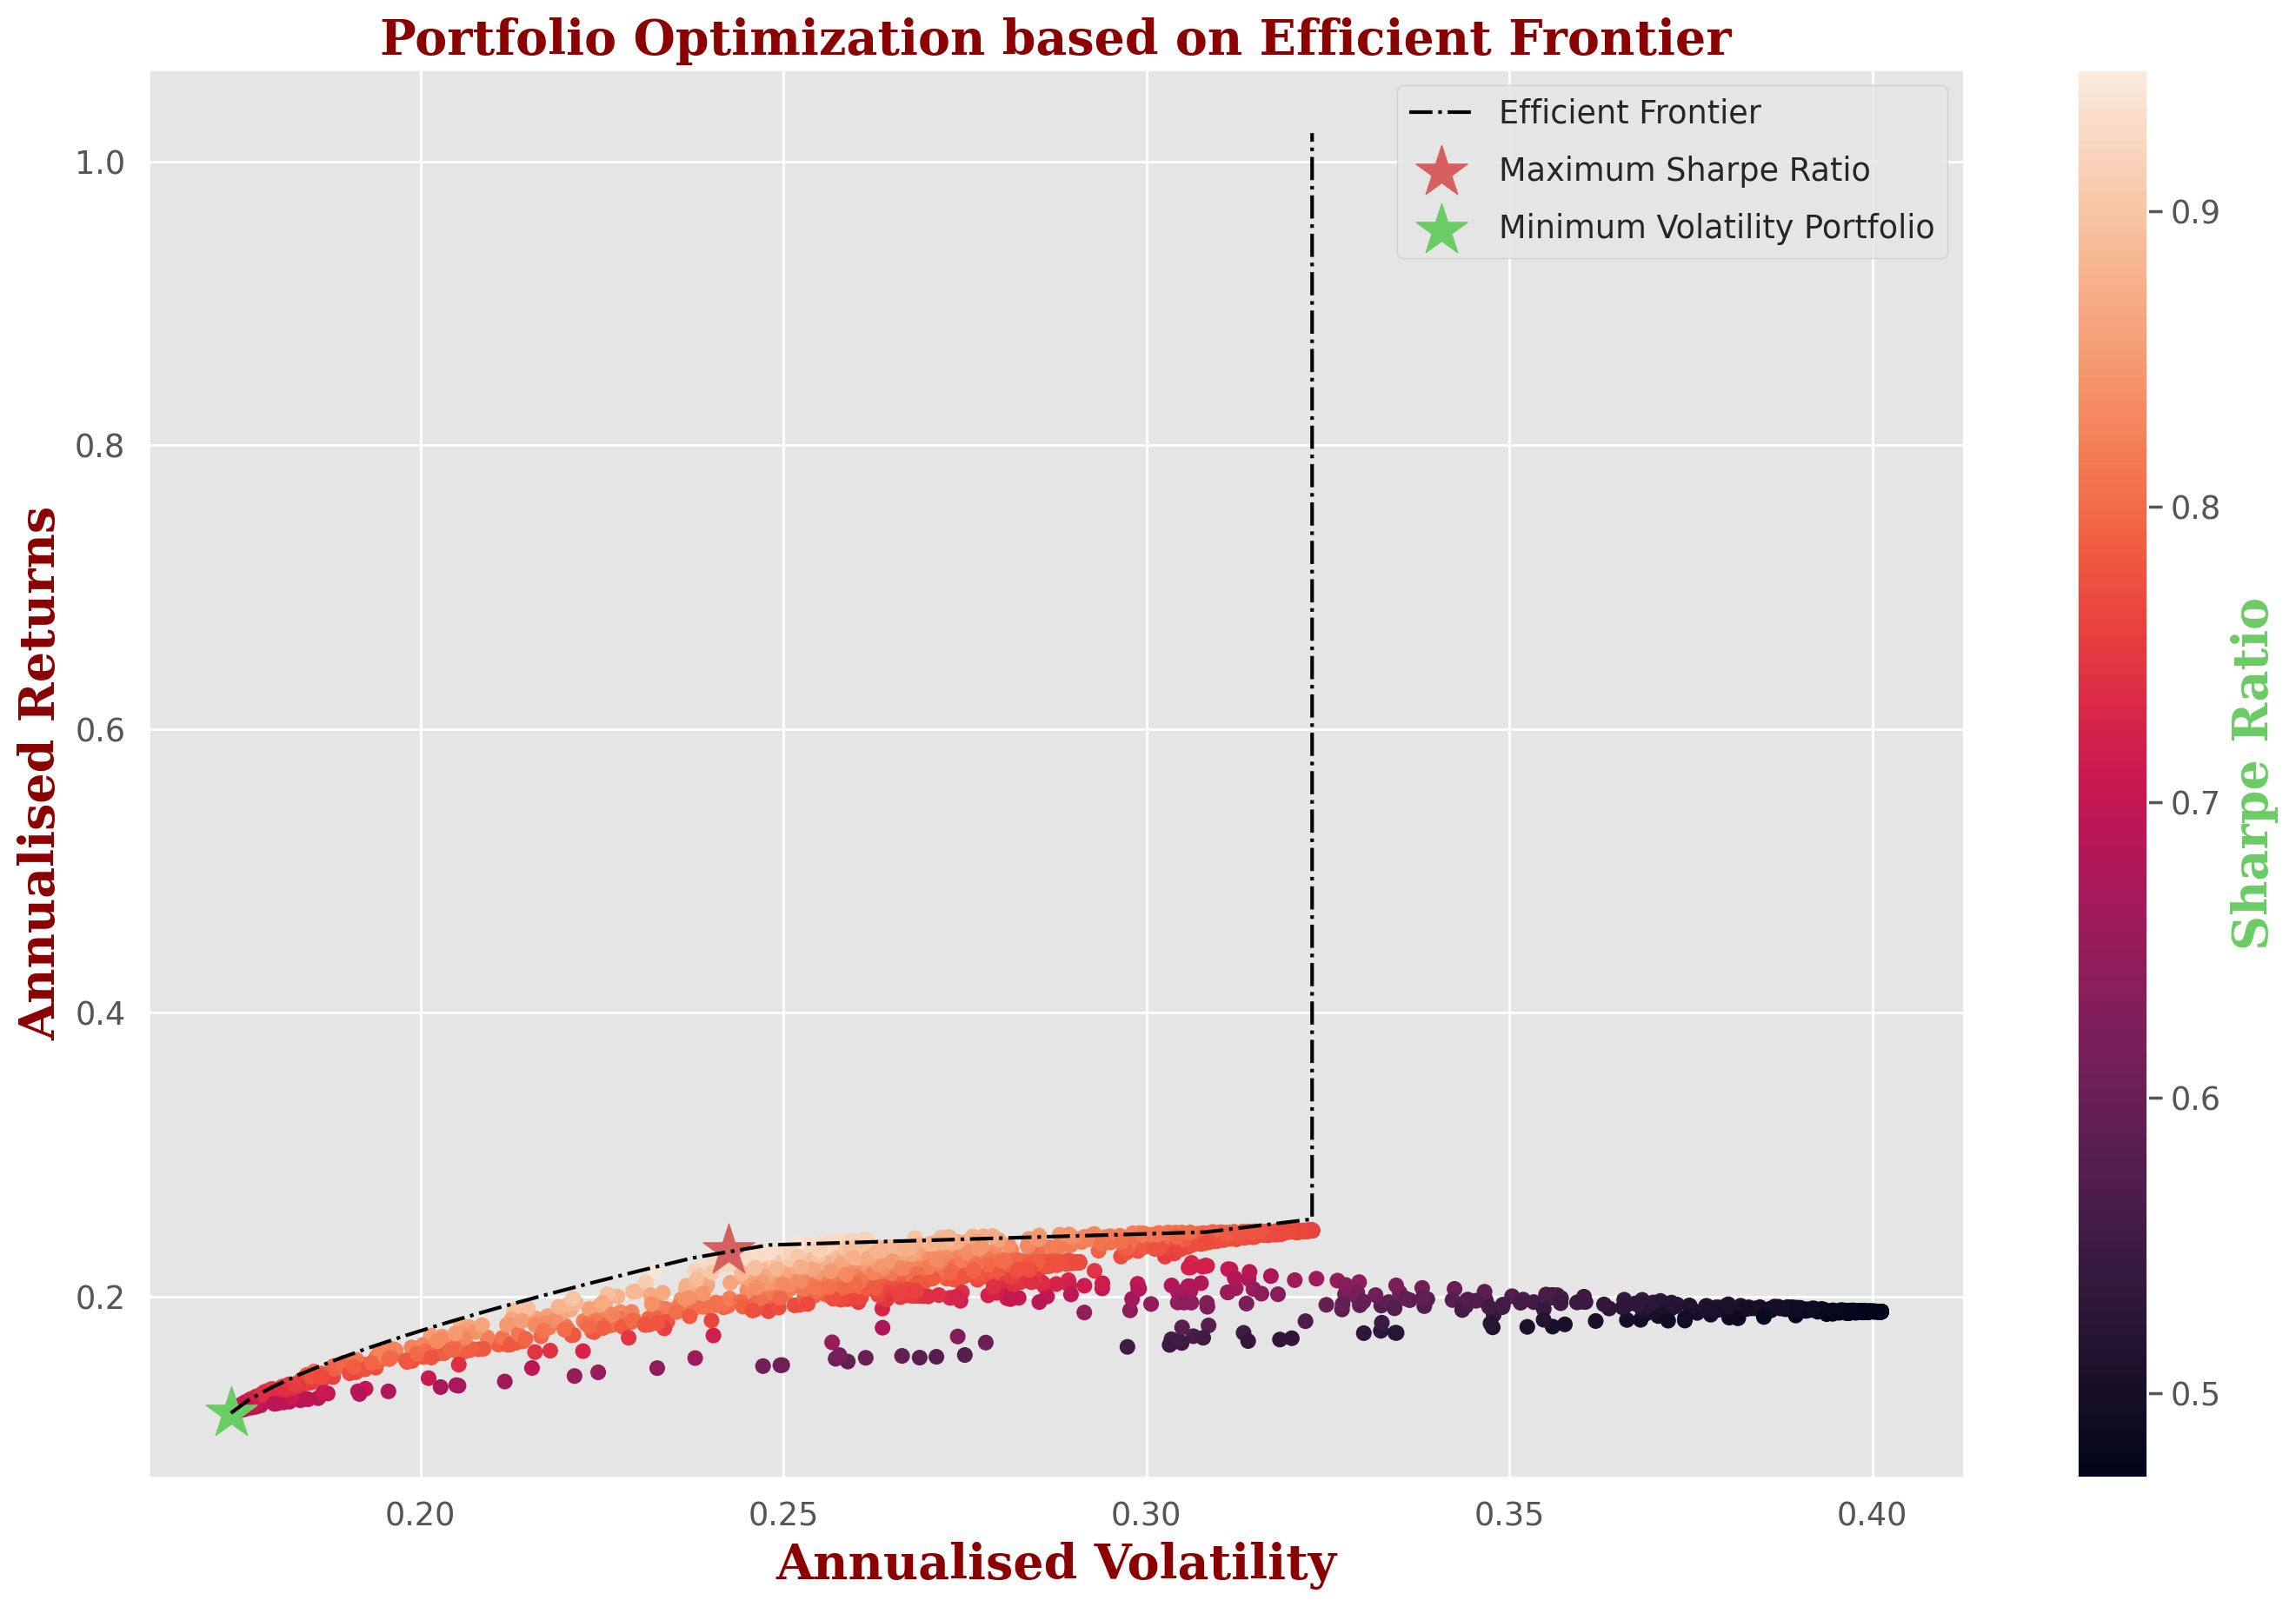

In [ ]:
sharpe_maximum      = max_sharpe_ratio()
return_p,vol_p      = portfolio_performance(sharpe_maximum['x'])
min_volatility      = min_vol()
return_min,vol_min  = portfolio_performance(min_volatility['x'])


plt.figure(figsize =(15,10))
plt.style.use('ggplot') 
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20) 
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
         label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g',  marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)

## Random portfolio simulation

Now we will move on to the crucial step of portfolio optimization: simulating a random portfolio using a Dirichlet distribution with weight limits. So we will try to generate 10,000 portfolios with a risk-free rate of $2.5\%$. To do this, we need to compute performance measures for each portfolio, such as the weighted average return during the year and the standard deviation and Sharpe ratio of each portfolio.

### Basic formulas for calculating the necessary functions

In [ ]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):# portfolio performance, calculate the annualised return, sharpe ratio
    portfolio_return = np.sum(mean_returns*weights)*252 #252 working days at the stock exchange
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252) # np.dot multiplication of matrices
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf): # random simulation
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights=np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df

In [ ]:
tickers = []
for i in dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].columns:
    tickers.append(i)

In [ ]:
mean_returns = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().mean()
cov = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().cov()
num_portfolios = 10000
rf = 0.025
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf) #random selection/creation of the portfolio

In [ ]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];

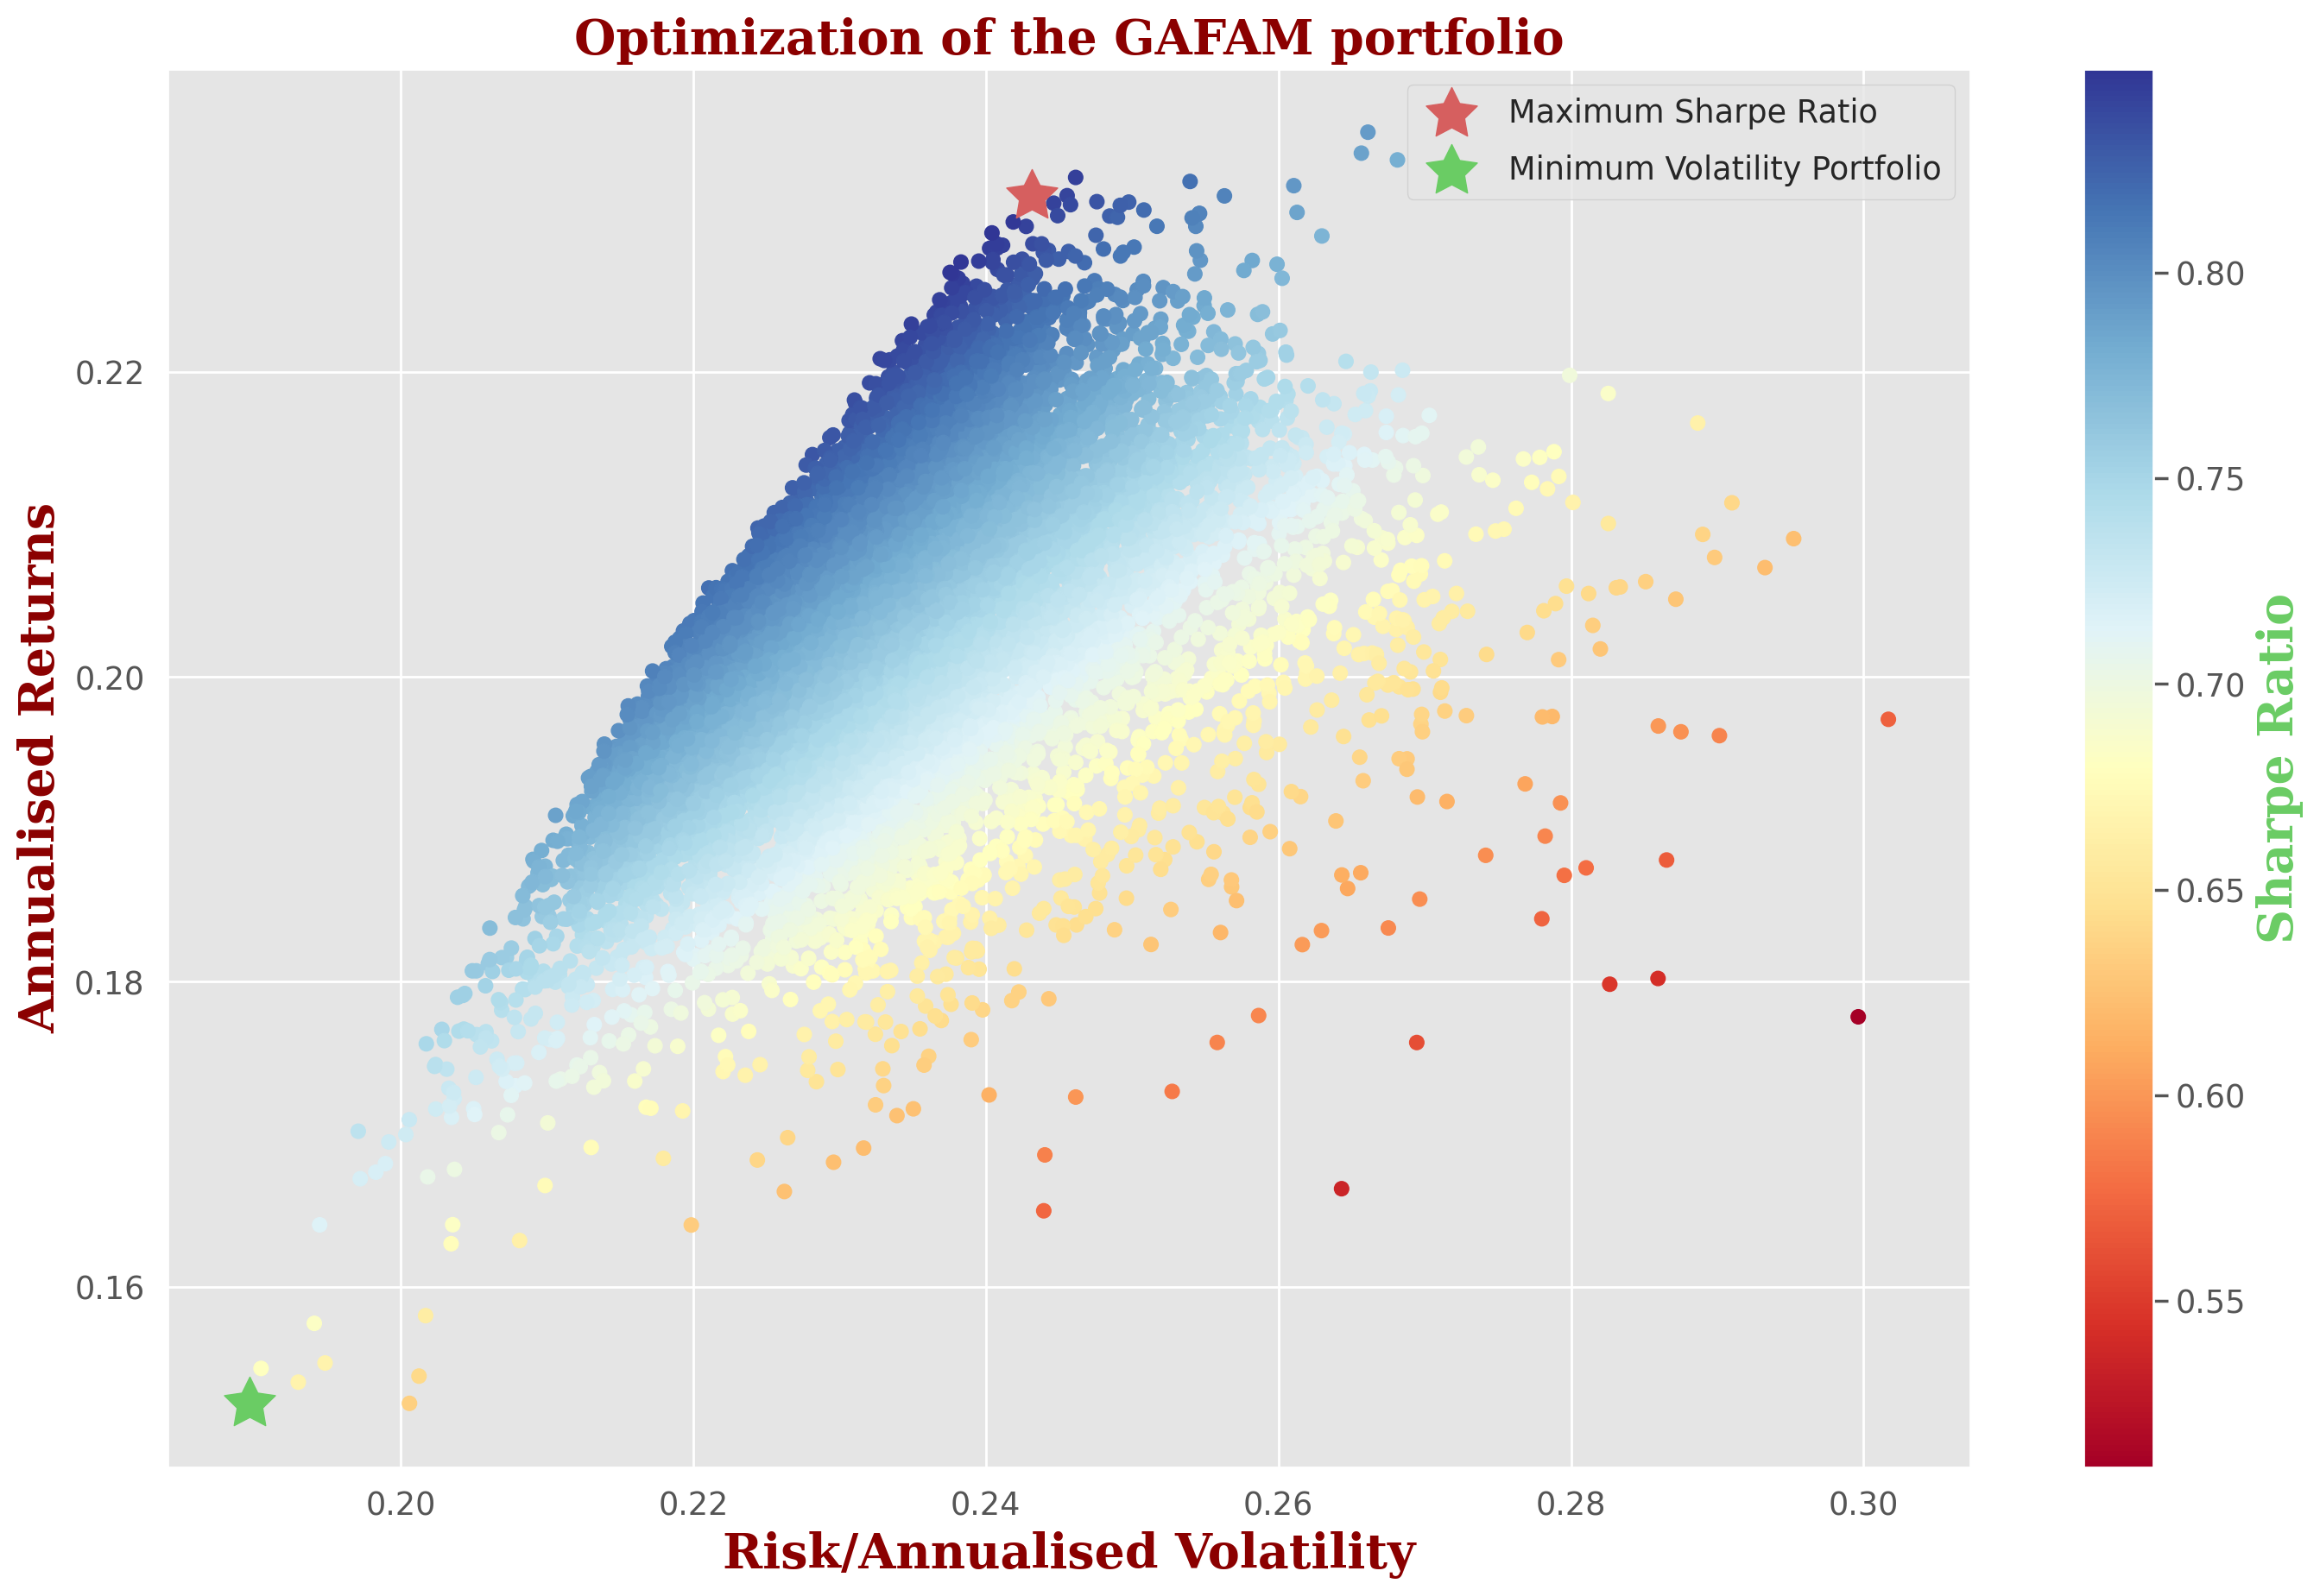

In [ ]:
#Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()] # max sharp ratio rouge
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()] # min volatility = min variance portfolio vert
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10)) # Number of rows/colums of the subplot grid
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu') #Colormaps in Matplotlib
plt.title('Optimization of the GAFAM portfolio',fontdict=font1)
plt.xlabel('Risk/Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
#plt.colorbar () # match the colorbar
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maximum Sharpe Ratio')
#plot green star to highlight position of minimum vartance portfolio
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatility Portfolio')
plt.legend(labelspacing=0.8)
plt.savefig('Portfolio_Optimization_Efficient_Frontier.pdf')
plt.show()

> Now, let's turn to the weights of the assets in the GAFAM portfolios. 

In [ ]:
max_sharpe_port.to_frame().T # portfolio with the highest Sharpe ratio. it is negative when the investment return is Lower than

ret    stdev    sharpe      GOOG      AAPL      META      AMZN  \
3270  0.231556  0.24312  0.849603  0.011955  0.269486  0.034679  0.209609   

          MSFT      GSPC  
3270  0.469536  0.004734

In [ ]:
min_vol_port.to_frame().T #portfolio with the Lowest variance portfolio

ret     stdev    sharpe      GOOG     AAPL      META      AMZN  \
2695  0.152335  0.189673  0.671342  0.129409  0.07794  0.052775  0.016958   

          MSFT      GSPC  
2695  0.079501  0.643417

> Looking at the table of weights in a portfolio with the highest Sharpe ratio, we can see that Microsoft has a higher weight than the other companies. In comparison, Facebook has a lower weight in a minimum variance portfolio. We can conclude that the better portfolio among these two weights is the one with high risk. If we consider the risk-adjusted return, this portfolio gave the highest Sharpe ratio ($0.953\%$) compared to the minimum variance portfolio, which means that it is the one for which the investor will receive the highest excess return for the additional risk he will take.

## Conclusion 

> In conclusion, the analysis of the stock market data for companies such as Google, Apple, Facebook, Amazon, Microsoft, and the S&P 500 has provided valuable insights.

* **Volatility**: The examination of annual and monthly volatilities revealed that Meta exhibited the highest volatility among the stocks, indicating greater price fluctuations and potential risk. This information can assist investors in understanding the risk profiles of these stocks and making informed investment decisions.

* **Correlation**: The correlation analysis indicated strong positive correlations between the S&P 500 and Microsoft, Amazon, and Microsoft and Google, Google and Apple, and Amazon and Microsoft. These correlations suggest potential interdependencies and can guide portfolio diversification strategies.

* **Risk-Adjusted Returns**: The evaluation of the Sharpe ratios offered insights into the risk-adjusted performance of the stocks. Microsoft emerged as the stock with the highest Sharpe ratio, indicating the potential for generating better risk-adjusted returns compared to the other stocks and the risk-free investment.

> Overall, these findings highlight the importance of considering factors such as volatility, correlation, and risk-adjusted returns when analyzing and selecting stocks for investment purposes. By taking into account these key metrics, investors can make more informed decisions, manage risk effectively, and potentially optimize their investment portfolios.

# References 

- [Volatilité et Ratio de Sharpe d'une action | Python for Finance](https://youtu.be/RrsJUaAWdEs)

- [Présentation projet analyse des données financières - Nour Mzoughi - Gestion des portefeuilles MEDAF](https://www.youtube.com/watch?v=73boS4j4zss&list=TLPQMDMwMzIwMjNZlMI_TgJCWA&index=1)

- [How Volatility Affects a Stock’s Return: Tested with Python](https://medium.com/analytics-vidhya/how-volatility-affects-a-stocks-return-tested-with-python-cdf7470d3808)
- [Beta of a Stock & CAPM from Scratch](https://www.kaggle.com/code/bhavinmoriya/beta-of-a-stock-capm-from-scratch)

- [Use Python to calculate the Sharpe ratio for a portfolio](https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805)
- [How to Calculate Sharpe Ratio with Pandas and NumPy](https://www.learnpythonwithrune.org/how-to-calculate-sharpe-ratio-with-pandas-and-numpy/)
- [Portfolio Management using Python — Portfolio Optimization](https://pub.towardsai.net/portfolio-management-using-python-portfolio-optimization-8a90dd2a21d)
- [Volatility And Measures Of Risk-Adjusted Return With Python](https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/)
- [Python for Finance: Risk and Return](https://www.learnpythonwithrune.org/python-for-finance-risk-and-return/)

- [Portfolio Optimization with Python using Efficient Frontier with Practical Examples](https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/)

- [Efficient Frontier in Python — Detailed Tutorial](https://towardsdatascience.com/efficient-frontier-in-python-detailed-tutorial-84a304f03e79)

- [Portfolio Optimization using MPT in Python](https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/)

- [The Efficient Frontier-Markowitz portfolio optimization in Python](https://github.com/aghanhussain/Markowitz-Portfolio-Optimization-with-Python/blob/master/The%20Efficient%20Frontier-Markowitz%20portfolio%20optimization%20in%20Python.ipynb)

- [Simulating Thousands of Random Portfolios to Illustrate the Efficient Frontier using Python](https://www.interviewqs.com/blog/efficient-frontier)

- [How to simulate financial portfolios with Python](https://towardsdatascience.com/how-to-simulate-financial-portfolios-with-python-d0dc4b52a278)

- [Portfolio simulation & efficient frontier(MPT) using Python](https://medium.com/@akjha22/portfolio-simulation-efficient-frontier-mpt-using-python-1ab99dd47efb)
